###                                                          QCI vs CIX Analysis

## VCS934 Mai Ndombe Vintage 2020 20kt Spot $/offset vs CNX 2024

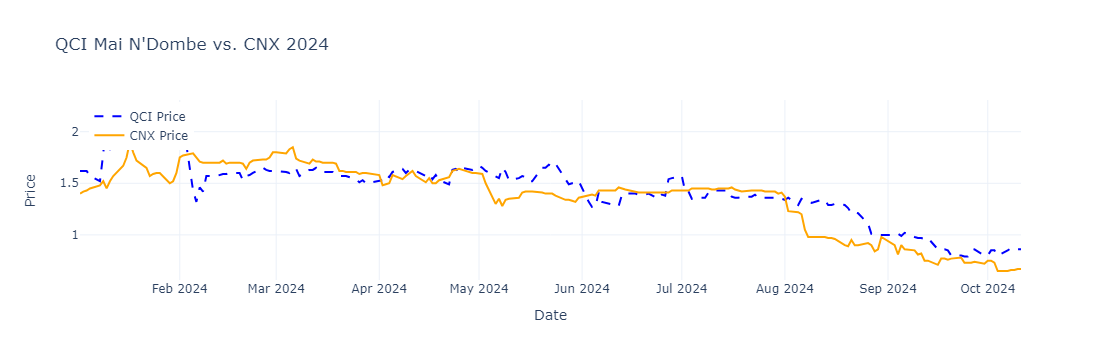

In [22]:
import warnings
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Step 2: Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\VCS934_QCI_vs_CNX_2024.csv" 
data = pd.read_csv(file_path)

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CNX_Date'] = pd.to_datetime(data['CNX_Date'], format='%d/%m/%Y')

# Create the interactive plot with Plotly
fig = go.Figure()

# Add QCI Price trace without markers
fig.add_trace(go.Scatter(
    x=data['QCI_Date'], y=data['QCI_Price'],
    mode='lines',  # No markers, just lines
    name='QCI Price',
    line=dict(color='blue', dash='dash'),
    hovertemplate='Date: %{x}<br>QCI Price: %{y}<extra></extra>'
))

# Add CIX Price trace without markers
fig.add_trace(go.Scatter(
    x=data['CNX_Date'], y=data['CNX_Price'],
    mode='lines',  # No markers, just lines
    name='CNX Price',
    line=dict(color='orange'),
    hovertemplate='Date: %{x}<br>CIX Price: %{y}<extra></extra>'
))

# Customize the layout
fig.update_layout(
    title="QCI Mai N'Dombe vs. CNX 2024",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode='x',
    template='plotly_white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(x=0.01, y=0.99)
)

# Show the interactive plot
fig.show()

### Other Observations

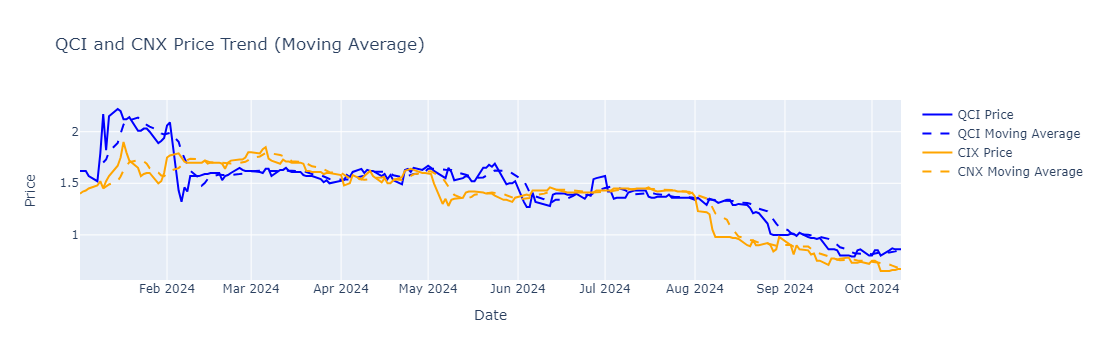

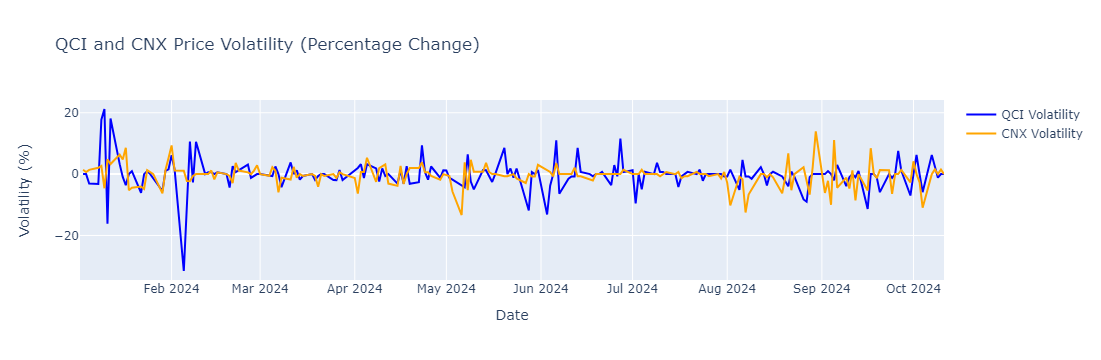

Correlation between QCI and CIX prices: 0.8279388865109119


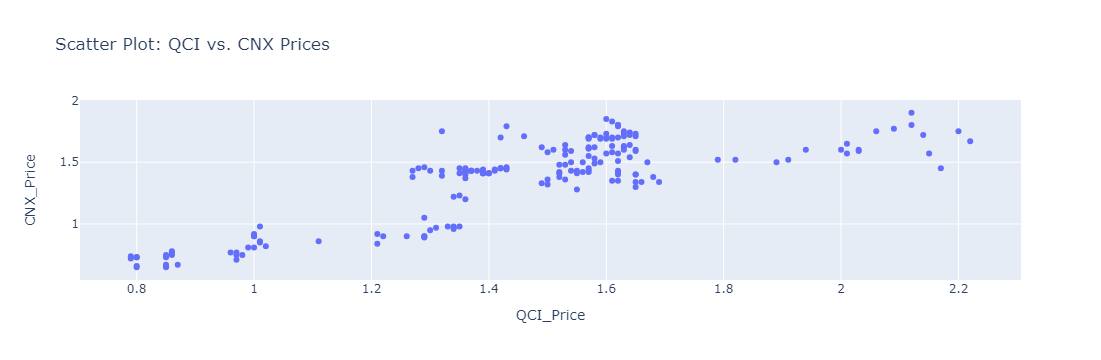

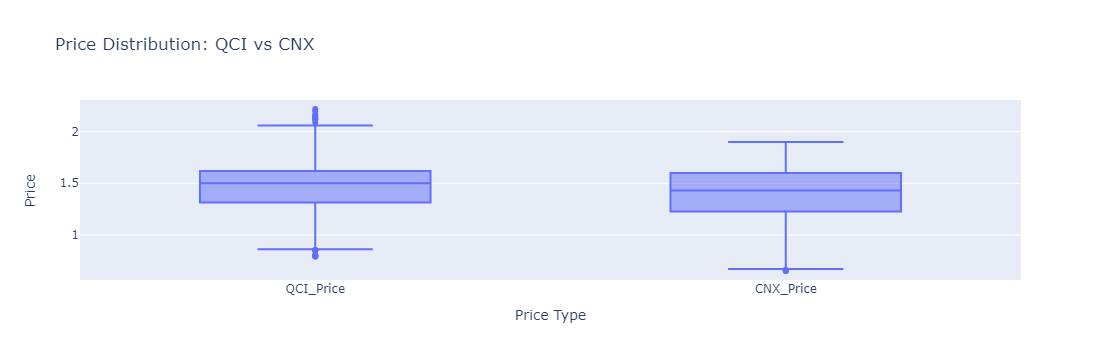

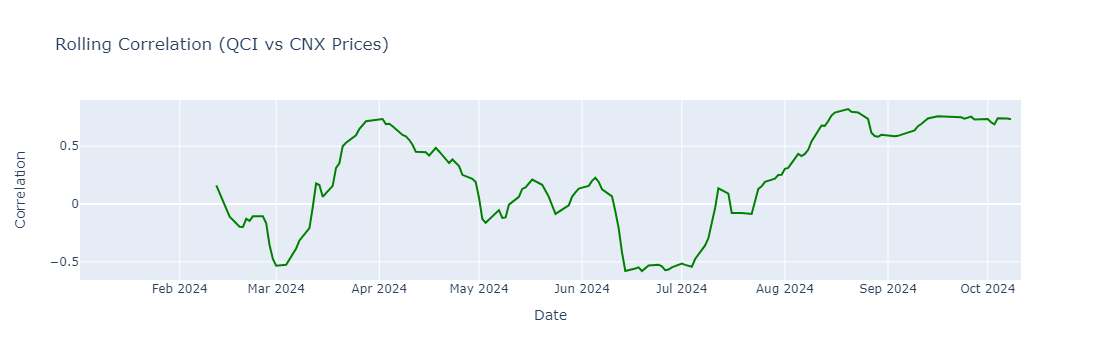

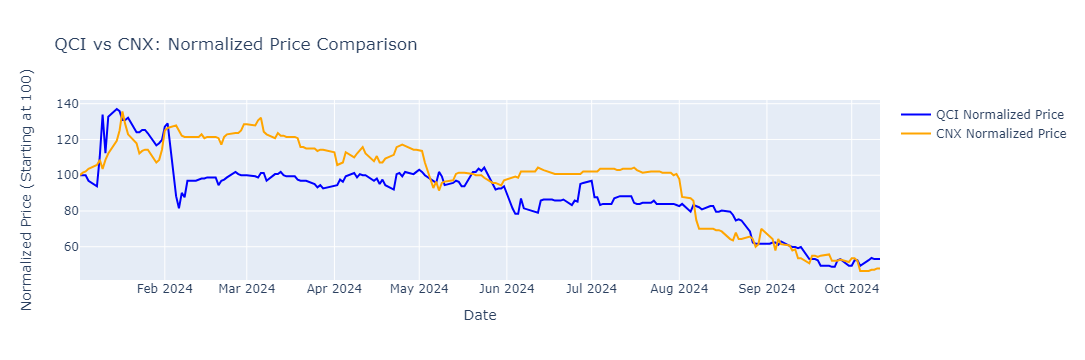

In [63]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the CSV file into a pandas DataFrame
file_path =r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\VCS934_QCI_vs_CNX_2024.csv"
data = pd.read_csv(file_path)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CNX_Date'] = pd.to_datetime(data['CNX_Date'], format='%d/%m/%Y')

# Set up QCI and CIX columns for convenience
data['QCI_Price'] = pd.to_numeric(data['QCI_Price'], errors='coerce')
data['CNX_Price'] = pd.to_numeric(data['CNX_Price'], errors='coerce')

### 1. Trend Analysis: Moving Average
# Calculate 7-day moving averages for QCI and CIX Prices
data['QCI_MA'] = data['QCI_Price'].rolling(window=7).mean()
data['CNX_MA'] = data['CNX_Price'].rolling(window=7).mean()

# Plot the moving averages
fig = go.Figure()

# Add QCI Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Price'], mode='lines', name='QCI Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_MA'], mode='lines', name='QCI Moving Average', line=dict(color='blue', dash='dash')))

# Add CIX Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['CNX_Date'], y=data['CNX_Price'], mode='lines', name='CIX Price', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['CNX_Date'], y=data['CNX_MA'], mode='lines', name='CNX Moving Average', line=dict(color='orange', dash='dash')))

# Layout
fig.update_layout(title="QCI and CNX Price Trend (Moving Average)", xaxis_title="Date", yaxis_title="Price")
fig.show()

### 2. Volatility Analysis: Daily Percentage Change
# Calculate percentage change for QCI and CIX prices
data['QCI_Volatility'] = data['QCI_Price'].pct_change() * 100
data['CNX_Volatility'] = data['CNX_Price'].pct_change() * 100

# Plot the volatility (percentage changes)
fig = go.Figure()

# Add QCI Volatility
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Volatility'], mode='lines', name='QCI Volatility', line=dict(color='blue')))

# Add CIX Volatility
fig.add_trace(go.Scatter(x=data['CNX_Date'], y=data['CNX_Volatility'], mode='lines', name='CNX Volatility', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI and CNX Price Volatility (Percentage Change)", xaxis_title="Date", yaxis_title="Volatility (%)")
fig.show()

### 3. Correlation Analysis
# Calculate the correlation between QCI and CIX Prices
correlation = data['QCI_Price'].corr(data['CNX_Price'])
print(f"Correlation between QCI and CIX prices: {correlation}")

# Scatter plot for correlation
fig = px.scatter(data, x='QCI_Price', y='CNX_Price', title="Scatter Plot: QCI vs. CNX Prices", labels={'x':'QCI Price', 'y':'CNX Price'})
fig.show()

### 4. Price Distribution and Outliers
# Box plot of QCI and CIX Prices to show distribution and outliers
fig = px.box(data, y=['QCI_Price', 'CNX_Price'], title="Price Distribution: QCI vs CNX", labels={'variable':'Price Type', 'value':'Price'})
fig.show()

### 5. Rolling Window Correlation (30-day window)
# Calculate rolling correlation between QCI and CIX prices (using a 30-day window)
data['Rolling_Correlation'] = data['QCI_Price'].rolling(window=30).corr(data['CNX_Price'])

# Plot the rolling correlation
fig = go.Figure()

# Add Rolling Correlation trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['Rolling_Correlation'], mode='lines', name='Rolling Correlation', line=dict(color='green')))

# Layout
fig.update_layout(title="Rolling Correlation (QCI vs CNX Prices)", xaxis_title="Date", yaxis_title="Correlation")
fig.show()

### 6. Relative Performance: Normalized Prices
# Normalize the prices to 100 at the start of the period for comparison
data['QCI_Normalized'] = data['QCI_Price'] / data['QCI_Price'].iloc[0] * 100
data['CNX_Normalized'] = data['CNX_Price'] / data['CNX_Price'].iloc[0] * 100

# Plot the normalized prices to show relative performance
fig = go.Figure()

# Add QCI Normalized Price trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Normalized'], mode='lines', name='QCI Normalized Price', line=dict(color='blue')))

# Add CIX Normalized Price trace
fig.add_trace(go.Scatter(x=data['CNX_Date'], y=data['CNX_Normalized'], mode='lines', name='CNX Normalized Price', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI vs CNX: Normalized Price Comparison", xaxis_title="Date", yaxis_title="Normalized Price (Starting at 100)")
fig.show()


## VCS934 Mai Ndombe Vintage 2019 20kt Spot $/offset vs CNX 2023

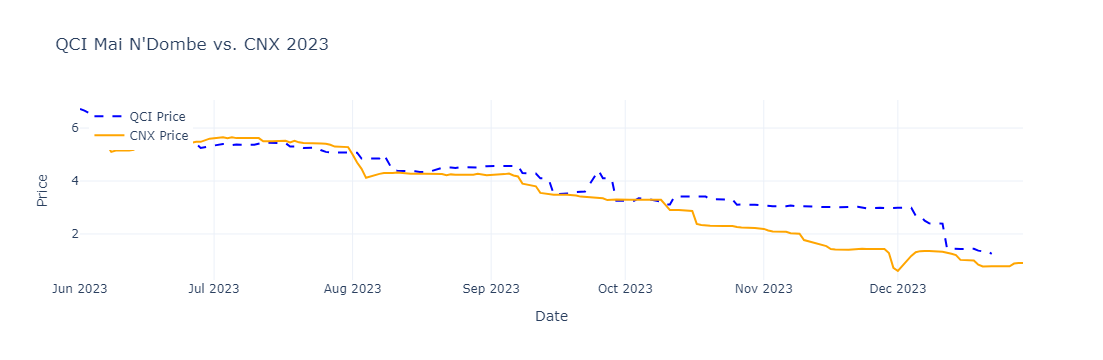

In [23]:
import warnings
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Step 2: Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\VCS934_QCI_vs_CNX_2023.csv"
data = pd.read_csv(file_path)

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CNX_Date'] = pd.to_datetime(data['CNX_Date'], format='%d/%m/%Y')

# Create the interactive plot with Plotly
fig = go.Figure()

# Add QCI Price trace without markers
fig.add_trace(go.Scatter(
    x=data['QCI_Date'], y=data['QCI_Price'],
    mode='lines',  # No markers, just lines
    name='QCI Price',
    line=dict(color='blue', dash='dash'),
    hovertemplate='Date: %{x}<br>QCI Price: %{y}<extra></extra>'
))

# Add CIX Price trace without markers
fig.add_trace(go.Scatter(
    x=data['CNX_Date'], y=data['CNX_Price'],
    mode='lines',  # No markers, just lines
    name='CNX Price',
    line=dict(color='orange'),
    hovertemplate='Date: %{x}<br>CIX Price: %{y}<extra></extra>'
))

# Customize the layout
fig.update_layout(
    title="QCI Mai N'Dombe vs. CNX 2023",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode='x',
    template='plotly_white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(x=0.01, y=0.99)
)

# Show the interactive plot
fig.show()

### Other Observations

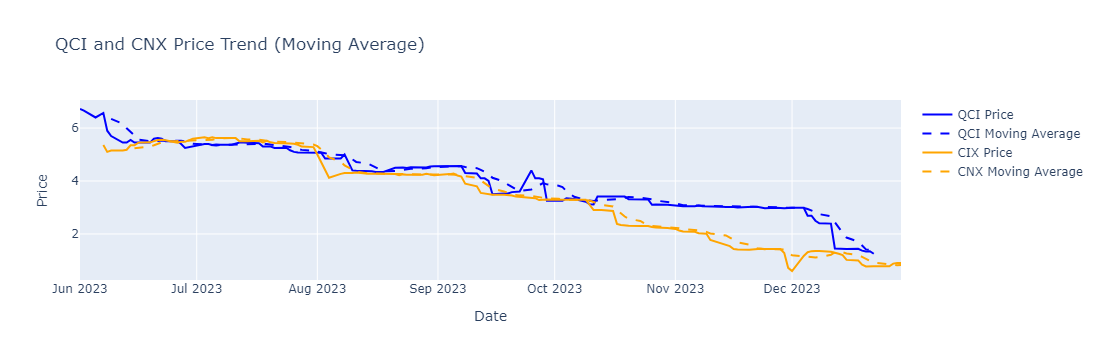

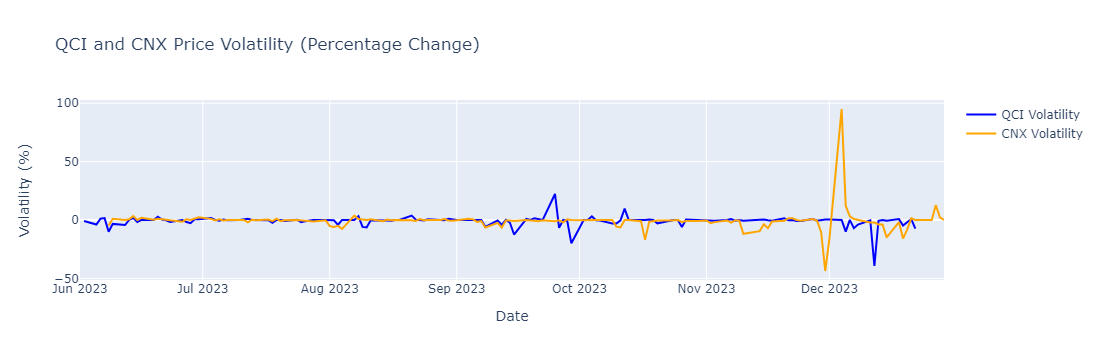

Correlation between QCI and CIX prices: 0.9413620786358877


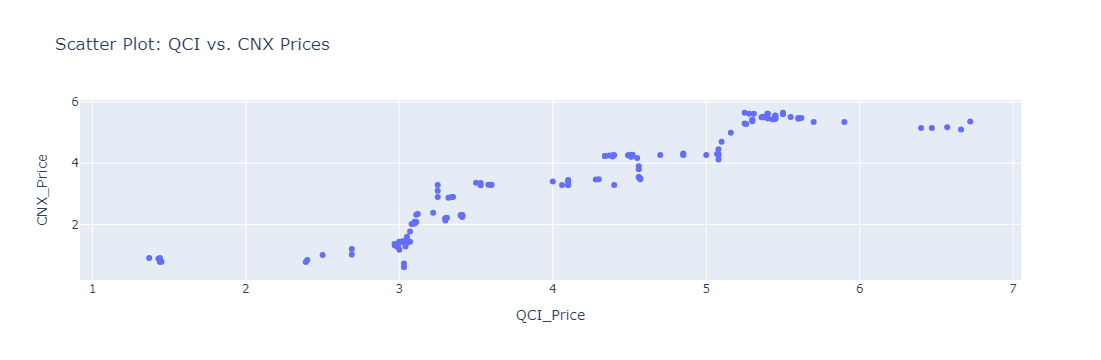

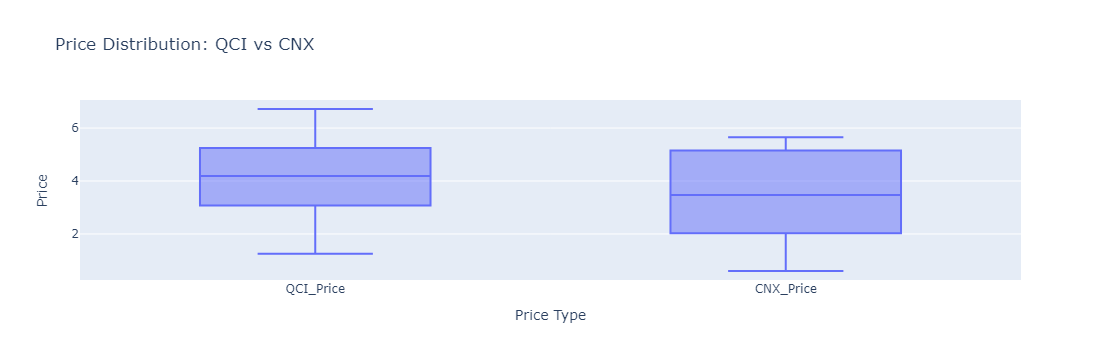

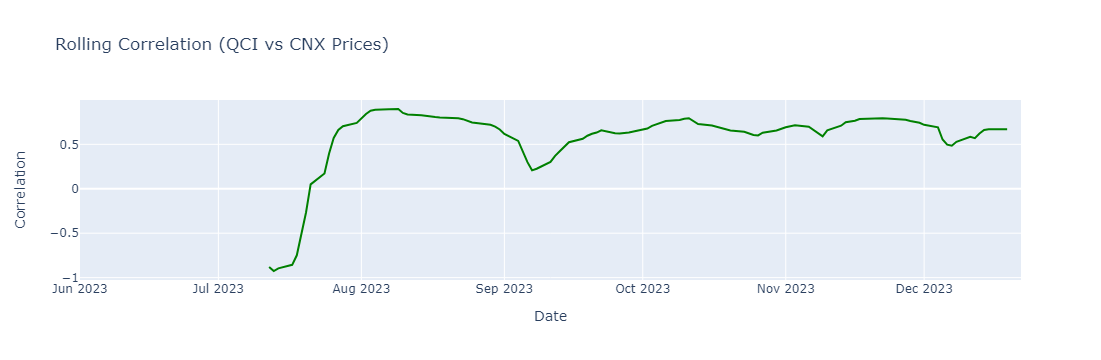

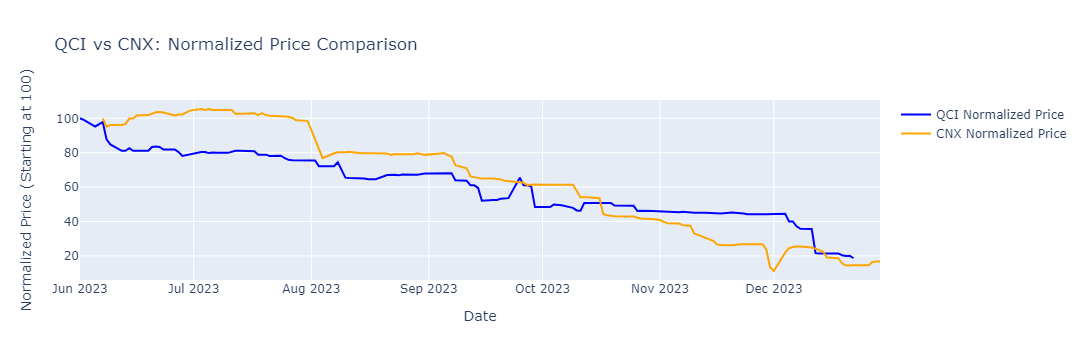

In [64]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the CSV file into a pandas DataFrame
file_path =r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\VCS934_QCI_vs_CNX_2023.csv"
data = pd.read_csv(file_path)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CNX_Date'] = pd.to_datetime(data['CNX_Date'], format='%d/%m/%Y')

# Set up QCI and CIX columns for convenience
data['QCI_Price'] = pd.to_numeric(data['QCI_Price'], errors='coerce')
data['CNX_Price'] = pd.to_numeric(data['CNX_Price'], errors='coerce')

### 1. Trend Analysis: Moving Average
# Calculate 7-day moving averages for QCI and CIX Prices
data['QCI_MA'] = data['QCI_Price'].rolling(window=7).mean()
data['CNX_MA'] = data['CNX_Price'].rolling(window=7).mean()

# Plot the moving averages
fig = go.Figure()

# Add QCI Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Price'], mode='lines', name='QCI Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_MA'], mode='lines', name='QCI Moving Average', line=dict(color='blue', dash='dash')))

# Add CIX Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['CNX_Date'], y=data['CNX_Price'], mode='lines', name='CIX Price', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['CNX_Date'], y=data['CNX_MA'], mode='lines', name='CNX Moving Average', line=dict(color='orange', dash='dash')))

# Layout
fig.update_layout(title="QCI and CNX Price Trend (Moving Average)", xaxis_title="Date", yaxis_title="Price")
fig.show()

### 2. Volatility Analysis: Daily Percentage Change
# Calculate percentage change for QCI and CIX prices
data['QCI_Volatility'] = data['QCI_Price'].pct_change() * 100
data['CNX_Volatility'] = data['CNX_Price'].pct_change() * 100

# Plot the volatility (percentage changes)
fig = go.Figure()

# Add QCI Volatility
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Volatility'], mode='lines', name='QCI Volatility', line=dict(color='blue')))

# Add CIX Volatility
fig.add_trace(go.Scatter(x=data['CNX_Date'], y=data['CNX_Volatility'], mode='lines', name='CNX Volatility', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI and CNX Price Volatility (Percentage Change)", xaxis_title="Date", yaxis_title="Volatility (%)")
fig.show()

### 3. Correlation Analysis
# Calculate the correlation between QCI and CIX Prices
correlation = data['QCI_Price'].corr(data['CNX_Price'])
print(f"Correlation between QCI and CIX prices: {correlation}")

# Scatter plot for correlation
fig = px.scatter(data, x='QCI_Price', y='CNX_Price', title="Scatter Plot: QCI vs. CNX Prices", labels={'x':'QCI Price', 'y':'CNX Price'})
fig.show()

### 4. Price Distribution and Outliers
# Box plot of QCI and CIX Prices to show distribution and outliers
fig = px.box(data, y=['QCI_Price', 'CNX_Price'], title="Price Distribution: QCI vs CNX", labels={'variable':'Price Type', 'value':'Price'})
fig.show()

### 5. Rolling Window Correlation (30-day window)
# Calculate rolling correlation between QCI and CIX prices (using a 30-day window)
data['Rolling_Correlation'] = data['QCI_Price'].rolling(window=30).corr(data['CNX_Price'])

# Plot the rolling correlation
fig = go.Figure()

# Add Rolling Correlation trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['Rolling_Correlation'], mode='lines', name='Rolling Correlation', line=dict(color='green')))

# Layout
fig.update_layout(title="Rolling Correlation (QCI vs CNX Prices)", xaxis_title="Date", yaxis_title="Correlation")
fig.show()

### 6. Relative Performance: Normalized Prices
# Normalize the prices to 100 at the start of the period for comparison
data['QCI_Normalized'] = data['QCI_Price'] / data['QCI_Price'].iloc[0] * 100
data['CNX_Normalized'] = data['CNX_Price'] / data['CNX_Price'].iloc[0] * 100

# Plot the normalized prices to show relative performance
fig = go.Figure()

# Add QCI Normalized Price trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Normalized'], mode='lines', name='QCI Normalized Price', line=dict(color='blue')))

# Add CIX Normalized Price trace
fig.add_trace(go.Scatter(x=data['CNX_Date'], y=data['CNX_Normalized'], mode='lines', name='CNX Normalized Price', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI vs CNX: Normalized Price Comparison", xaxis_title="Date", yaxis_title="Normalized Price (Starting at 100)")
fig.show()


## VCS1477 Katingan Vintage 2020 20kt Spot $/offset vs CIX Katingan 2024

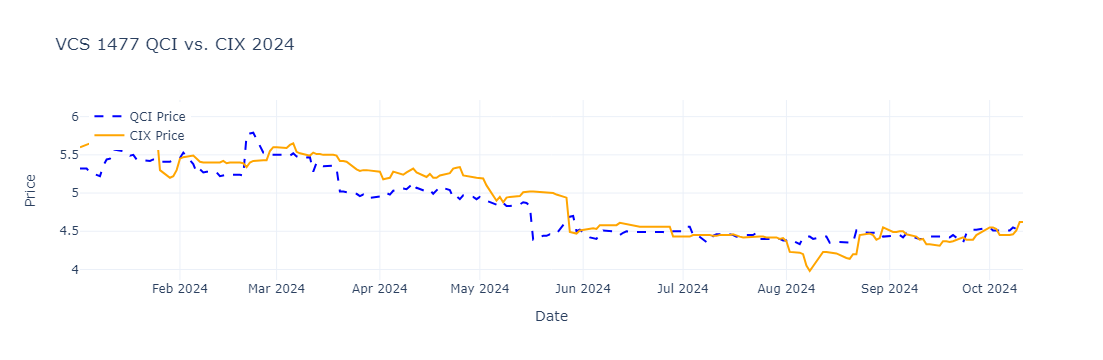

In [26]:
import warnings
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Step 2: Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\VCS1477_v20_vs_CIX.csv"
data = pd.read_csv(file_path)

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CIX_Date'] = pd.to_datetime(data['CIX_Date'], format='%d/%m/%Y')

# Create the interactive plot with Plotly
fig = go.Figure()

# Add QCI Price trace without markers
fig.add_trace(go.Scatter(
    x=data['QCI_Date'], y=data['QCI_Price'],
    mode='lines',  # No markers, just lines
    name='QCI Price',
    line=dict(color='blue', dash='dash'),
    hovertemplate='Date: %{x}<br>QCI Price: %{y}<extra></extra>'
))

# Add CIX Price trace without markers
fig.add_trace(go.Scatter(
    x=data['CIX_Date'], y=data['CIX_Price'],
    mode='lines',  # No markers, just lines
    name='CIX Price',
    line=dict(color='orange'),
    hovertemplate='Date: %{x}<br>CIX Price: %{y}<extra></extra>'
))

# Customize the layout
fig.update_layout(
    title="VCS 1477 QCI vs. CIX 2024",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode='x',
    template='plotly_white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(x=0.01, y=0.99)
)

# Show the interactive plot
fig.show()


### Other Observations

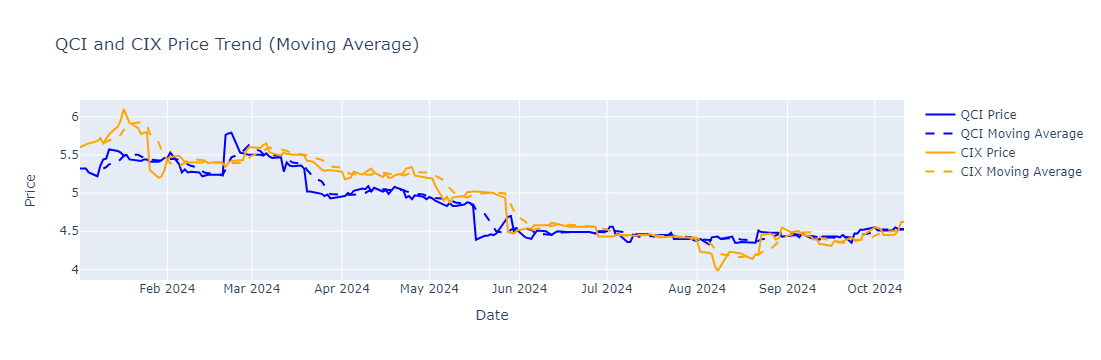

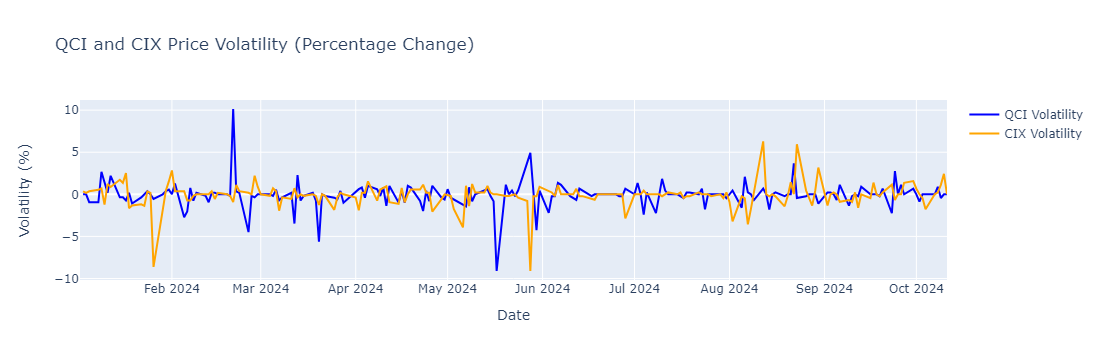

Correlation between QCI and CIX prices: 0.9384026826896605


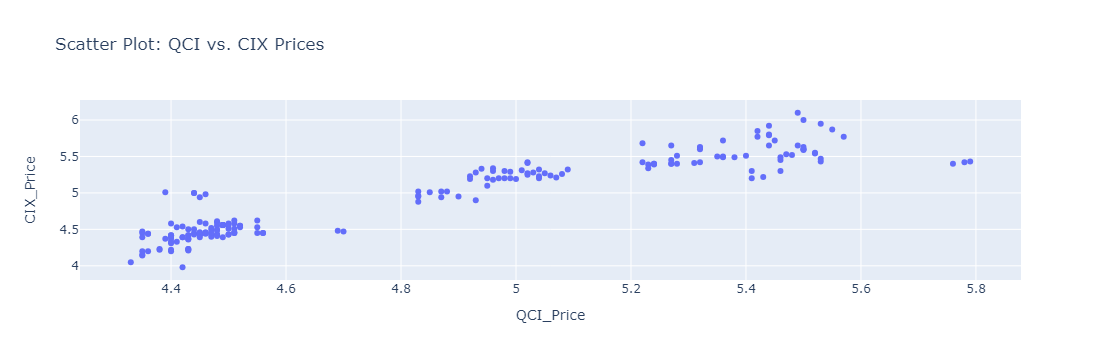

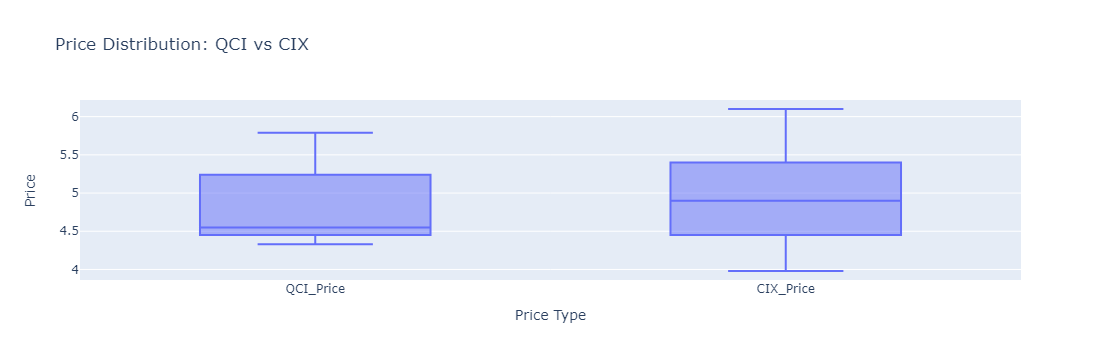

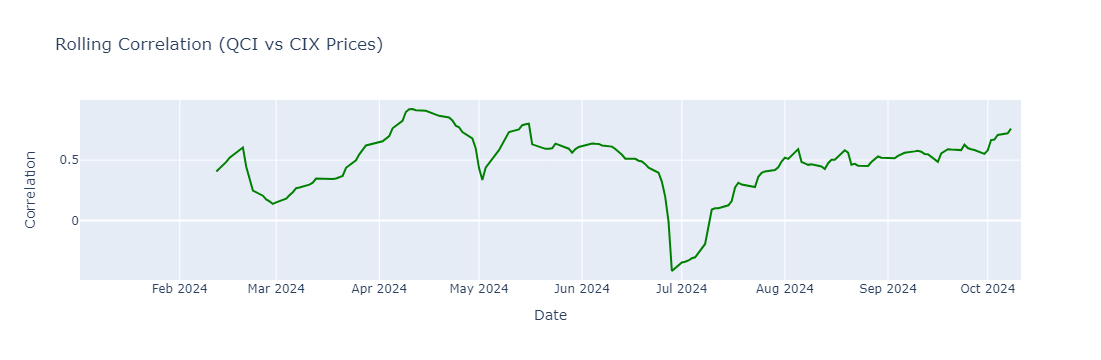

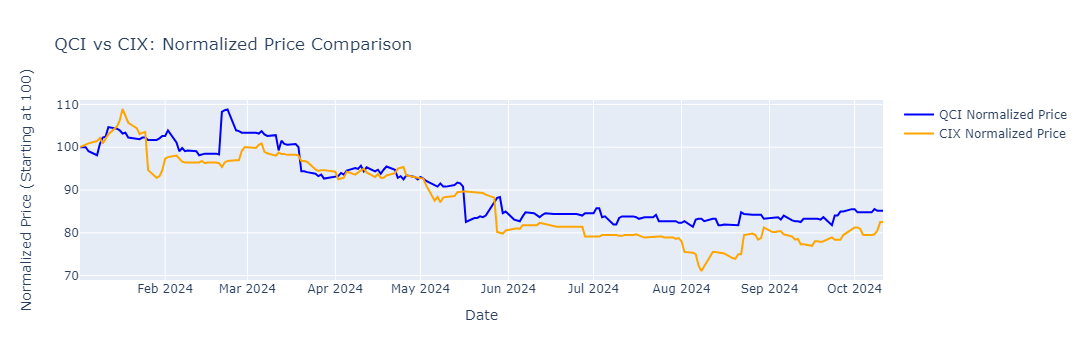

In [65]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\VCS1477_v20_vs_CIX.csv"
data = pd.read_csv(file_path)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CIX_Date'] = pd.to_datetime(data['CIX_Date'], format='%d/%m/%Y')

# Set up QCI and CIX columns for convenience
data['QCI_Price'] = pd.to_numeric(data['QCI_Price'], errors='coerce')
data['CIX_Price'] = pd.to_numeric(data['CIX_Price'], errors='coerce')

### 1. Trend Analysis: Moving Average
# Calculate 7-day moving averages for QCI and CIX Prices
data['QCI_MA'] = data['QCI_Price'].rolling(window=7).mean()
data['CIX_MA'] = data['CIX_Price'].rolling(window=7).mean()

# Plot the moving averages
fig = go.Figure()

# Add QCI Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Price'], mode='lines', name='QCI Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_MA'], mode='lines', name='QCI Moving Average', line=dict(color='blue', dash='dash')))

# Add CIX Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Price'], mode='lines', name='CIX Price', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_MA'], mode='lines', name='CIX Moving Average', line=dict(color='orange', dash='dash')))

# Layout
fig.update_layout(title="QCI and CIX Price Trend (Moving Average)", xaxis_title="Date", yaxis_title="Price")
fig.show()

### 2. Volatility Analysis: Daily Percentage Change
# Calculate percentage change for QCI and CIX prices
data['QCI_Volatility'] = data['QCI_Price'].pct_change() * 100
data['CIX_Volatility'] = data['CIX_Price'].pct_change() * 100

# Plot the volatility (percentage changes)
fig = go.Figure()

# Add QCI Volatility
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Volatility'], mode='lines', name='QCI Volatility', line=dict(color='blue')))

# Add CIX Volatility
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Volatility'], mode='lines', name='CIX Volatility', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI and CIX Price Volatility (Percentage Change)", xaxis_title="Date", yaxis_title="Volatility (%)")
fig.show()

### 3. Correlation Analysis
# Calculate the correlation between QCI and CIX Prices
correlation = data['QCI_Price'].corr(data['CIX_Price'])
print(f"Correlation between QCI and CIX prices: {correlation}")

# Scatter plot for correlation
fig = px.scatter(data, x='QCI_Price', y='CIX_Price', title="Scatter Plot: QCI vs. CIX Prices", labels={'x':'QCI Price', 'y':'CIX Price'})
fig.show()

### 4. Price Distribution and Outliers
# Box plot of QCI and CIX Prices to show distribution and outliers
fig = px.box(data, y=['QCI_Price', 'CIX_Price'], title="Price Distribution: QCI vs CIX", labels={'variable':'Price Type', 'value':'Price'})
fig.show()

### 5. Rolling Window Correlation (30-day window)
# Calculate rolling correlation between QCI and CIX prices (using a 30-day window)
data['Rolling_Correlation'] = data['QCI_Price'].rolling(window=30).corr(data['CIX_Price'])

# Plot the rolling correlation
fig = go.Figure()

# Add Rolling Correlation trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['Rolling_Correlation'], mode='lines', name='Rolling Correlation', line=dict(color='green')))

# Layout
fig.update_layout(title="Rolling Correlation (QCI vs CIX Prices)", xaxis_title="Date", yaxis_title="Correlation")
fig.show()

### 6. Relative Performance: Normalized Prices
# Normalize the prices to 100 at the start of the period for comparison
data['QCI_Normalized'] = data['QCI_Price'] / data['QCI_Price'].iloc[0] * 100
data['CIX_Normalized'] = data['CIX_Price'] / data['CIX_Price'].iloc[0] * 100

# Plot the normalized prices to show relative performance
fig = go.Figure()

# Add QCI Normalized Price trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Normalized'], mode='lines', name='QCI Normalized Price', line=dict(color='blue')))

# Add CIX Normalized Price trace
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Normalized'], mode='lines', name='CIX Normalized Price', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI vs CIX: Normalized Price Comparison", xaxis_title="Date", yaxis_title="Normalized Price (Starting at 100)")
fig.show()


## VCS1477 Katingan Vintage 2020 20kt Spot $/offset vs CIX Katingan 2023

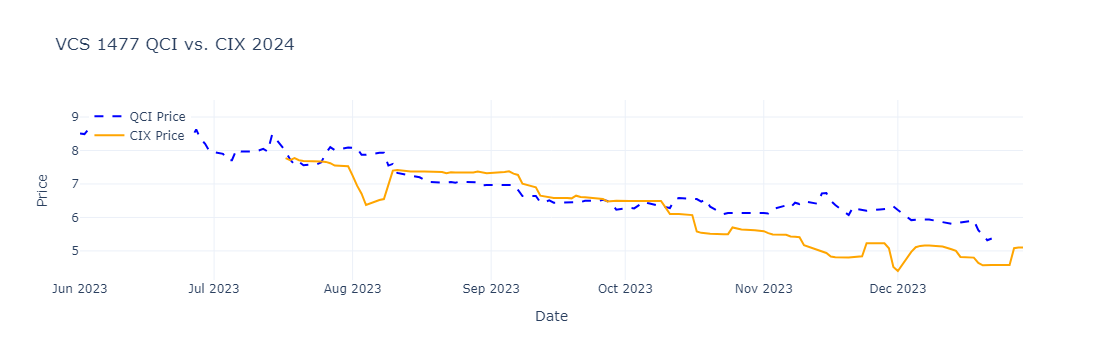

In [28]:
import warnings
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Step 2: Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\VCS1477_v19_vs_CIX.csv"
data = pd.read_csv(file_path)

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CIX_Date'] = pd.to_datetime(data['CIX_Date'], format='%d/%m/%Y')

# Create the interactive plot with Plotly
fig = go.Figure()

# Add QCI Price trace without markers
fig.add_trace(go.Scatter(
    x=data['QCI_Date'], y=data['QCI_Price'],
    mode='lines',  # No markers, just lines
    name='QCI Price',
    line=dict(color='blue', dash='dash'),
    hovertemplate='Date: %{x}<br>QCI Price: %{y}<extra></extra>'
))

# Add CIX Price trace without markers
fig.add_trace(go.Scatter(
    x=data['CIX_Date'], y=data['CIX_Price'],
    mode='lines',  # No markers, just lines
    name='CIX Price',
    line=dict(color='orange'),
    hovertemplate='Date: %{x}<br>CIX Price: %{y}<extra></extra>'
))

# Customize the layout
fig.update_layout(
    title="VCS 1477 QCI vs. CIX 2024",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode='x',
    template='plotly_white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(x=0.01, y=0.99)
)

# Show the interactive plot
fig.show()

### Other Observations

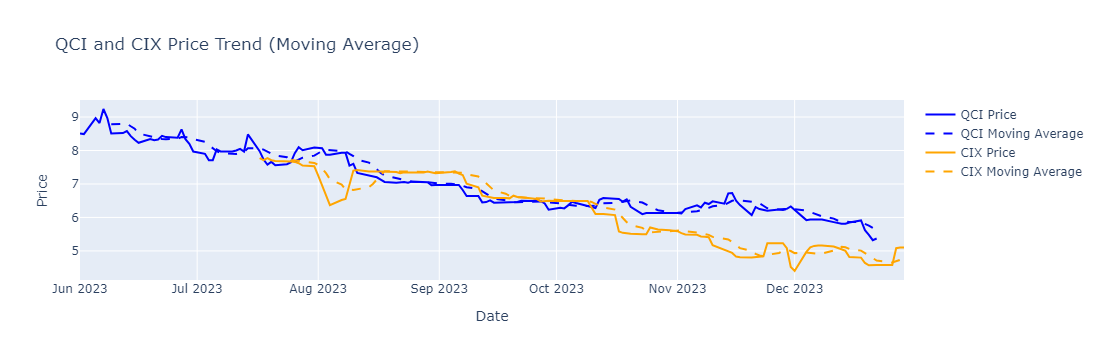

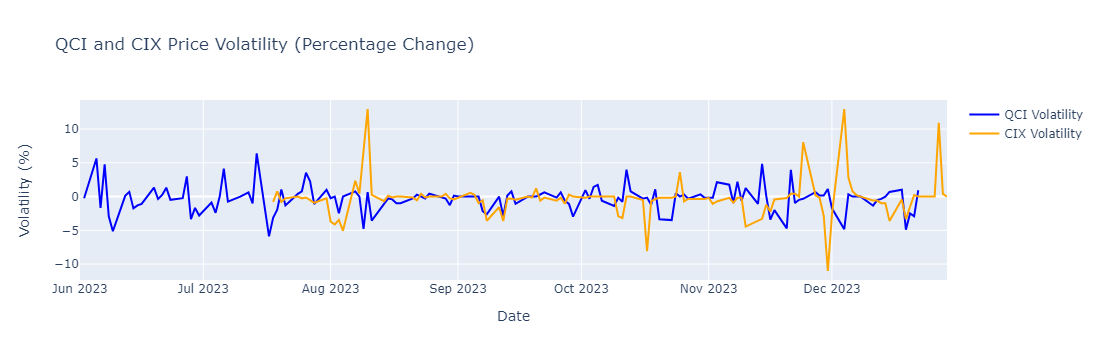

Correlation between QCI and CIX prices: 0.9227388466400684


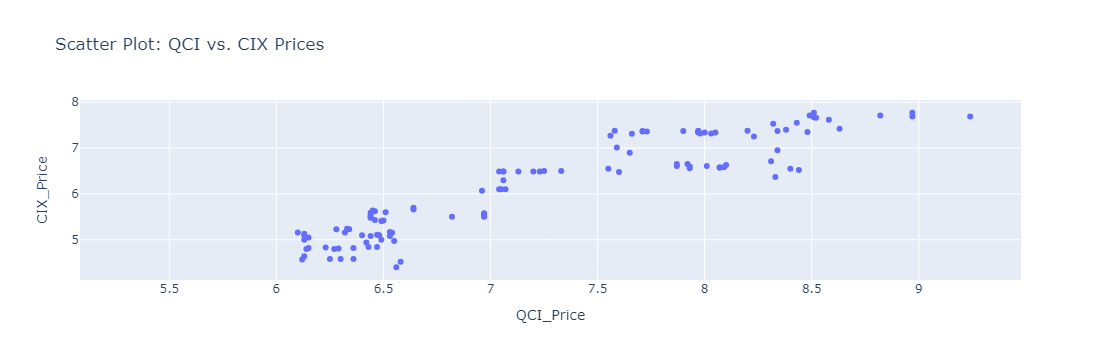

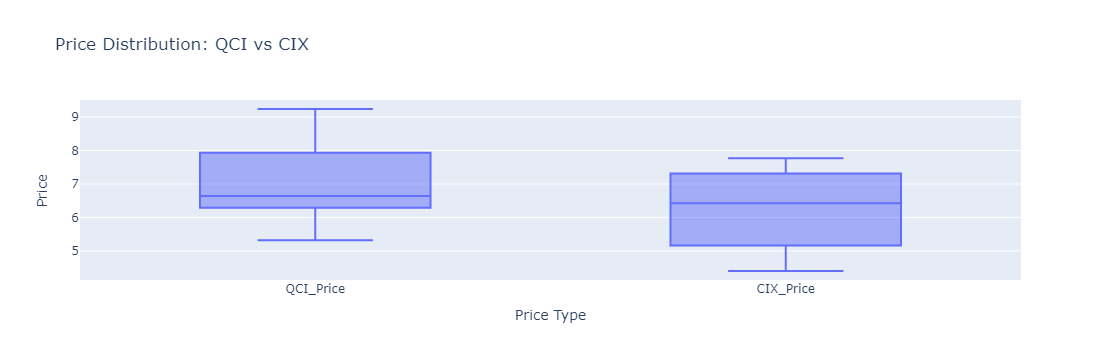

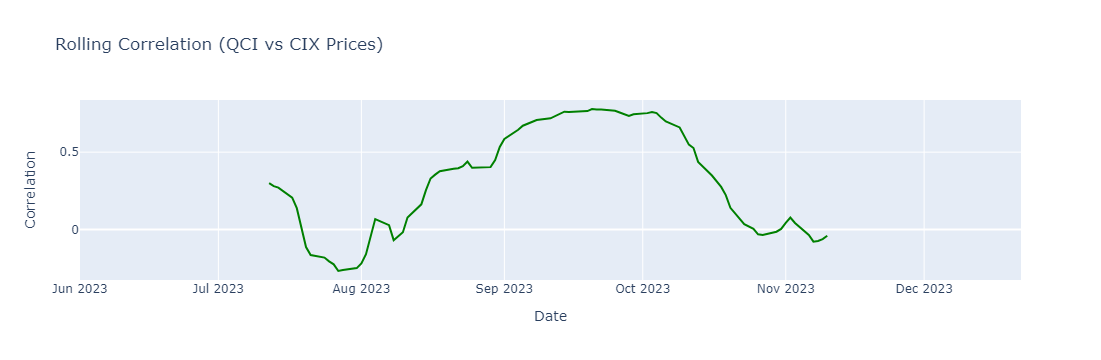

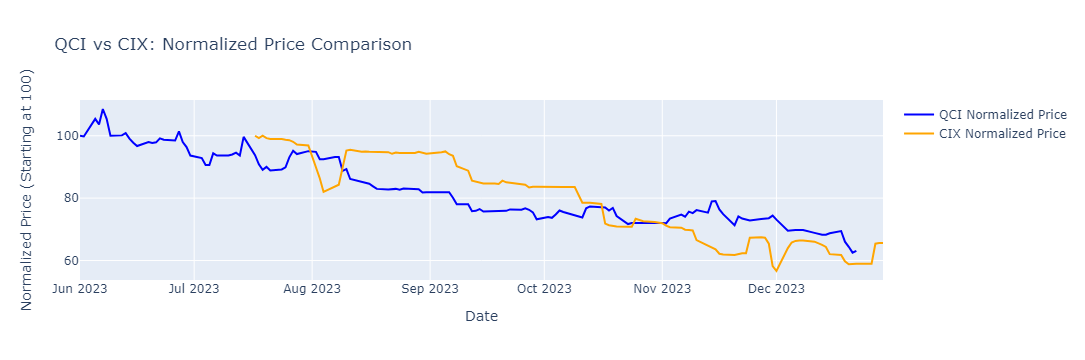

In [66]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the CSV file into a pandas DataFrame
file_path =  r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\VCS1477_v19_vs_CIX.csv"
data = pd.read_csv(file_path)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CIX_Date'] = pd.to_datetime(data['CIX_Date'], format='%d/%m/%Y')

# Set up QCI and CIX columns for convenience
data['QCI_Price'] = pd.to_numeric(data['QCI_Price'], errors='coerce')
data['CIX_Price'] = pd.to_numeric(data['CIX_Price'], errors='coerce')

### 1. Trend Analysis: Moving Average
# Calculate 7-day moving averages for QCI and CIX Prices
data['QCI_MA'] = data['QCI_Price'].rolling(window=7).mean()
data['CIX_MA'] = data['CIX_Price'].rolling(window=7).mean()

# Plot the moving averages
fig = go.Figure()

# Add QCI Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Price'], mode='lines', name='QCI Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_MA'], mode='lines', name='QCI Moving Average', line=dict(color='blue', dash='dash')))

# Add CIX Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Price'], mode='lines', name='CIX Price', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_MA'], mode='lines', name='CIX Moving Average', line=dict(color='orange', dash='dash')))

# Layout
fig.update_layout(title="QCI and CIX Price Trend (Moving Average)", xaxis_title="Date", yaxis_title="Price")
fig.show()

### 2. Volatility Analysis: Daily Percentage Change
# Calculate percentage change for QCI and CIX prices
data['QCI_Volatility'] = data['QCI_Price'].pct_change() * 100
data['CIX_Volatility'] = data['CIX_Price'].pct_change() * 100

# Plot the volatility (percentage changes)
fig = go.Figure()

# Add QCI Volatility
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Volatility'], mode='lines', name='QCI Volatility', line=dict(color='blue')))

# Add CIX Volatility
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Volatility'], mode='lines', name='CIX Volatility', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI and CIX Price Volatility (Percentage Change)", xaxis_title="Date", yaxis_title="Volatility (%)")
fig.show()

### 3. Correlation Analysis
# Calculate the correlation between QCI and CIX Prices
correlation = data['QCI_Price'].corr(data['CIX_Price'])
print(f"Correlation between QCI and CIX prices: {correlation}")

# Scatter plot for correlation
fig = px.scatter(data, x='QCI_Price', y='CIX_Price', title="Scatter Plot: QCI vs. CIX Prices", labels={'x':'QCI Price', 'y':'CIX Price'})
fig.show()

### 4. Price Distribution and Outliers
# Box plot of QCI and CIX Prices to show distribution and outliers
fig = px.box(data, y=['QCI_Price', 'CIX_Price'], title="Price Distribution: QCI vs CIX", labels={'variable':'Price Type', 'value':'Price'})
fig.show()

### 5. Rolling Window Correlation (30-day window)
# Calculate rolling correlation between QCI and CIX prices (using a 30-day window)
data['Rolling_Correlation'] = data['QCI_Price'].rolling(window=30).corr(data['CIX_Price'])

# Plot the rolling correlation
fig = go.Figure()

# Add Rolling Correlation trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['Rolling_Correlation'], mode='lines', name='Rolling Correlation', line=dict(color='green')))

# Layout
fig.update_layout(title="Rolling Correlation (QCI vs CIX Prices)", xaxis_title="Date", yaxis_title="Correlation")
fig.show()

### 6. Relative Performance: Normalized Prices
# Normalize the prices to 100 at the start of the period for comparison
data['QCI_Normalized'] = data['QCI_Price'] / data['QCI_Price'].iloc[0] * 100
data['CIX_Normalized'] = data['CIX_Price'] / data['CIX_Price'].iloc[0] * 100

# Plot the normalized prices to show relative performance
fig = go.Figure()

# Add QCI Normalized Price trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Normalized'], mode='lines', name='QCI Normalized Price', line=dict(color='blue')))

# Add CIX Normalized Price trace
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Normalized'], mode='lines', name='CIX Normalized Price', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI vs CIX: Normalized Price Comparison", xaxis_title="Date", yaxis_title="Normalized Price (Starting at 100)")
fig.show()


## VCS VCS REDD+ CCB Gold Vintage 2020 20kt Spot $/offset vs CNX 2024

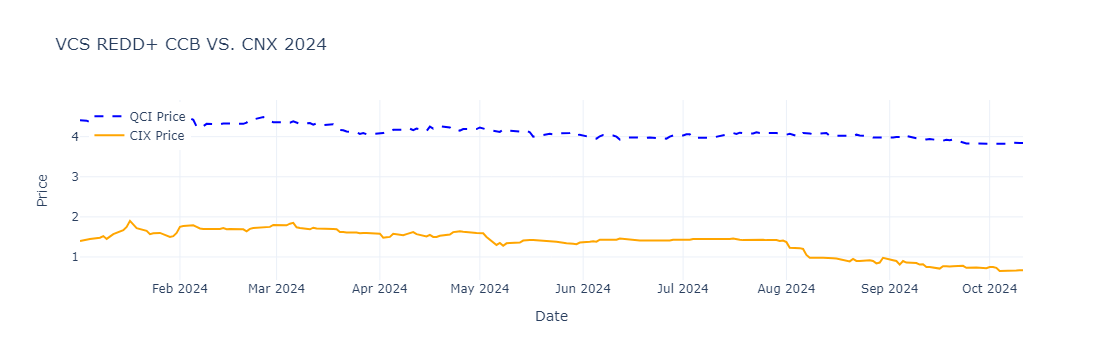

In [37]:
import warnings
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Step 2: Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\VCSREDD_v20_vs_CNX.csv"
data = pd.read_csv(file_path)

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CIX_Date'] = pd.to_datetime(data['CIX_Date'], format='%d/%m/%Y')

# Create the interactive plot with Plotly
fig = go.Figure()

# Add QCI Price trace without markers
fig.add_trace(go.Scatter(
    x=data['QCI_Date'], y=data['QCI_Price'],
    mode='lines',  # No markers, just lines
    name='QCI Price',
    line=dict(color='blue', dash='dash'),
    hovertemplate='Date: %{x}<br>QCI Price: %{y}<extra></extra>'
))

# Add CIX Price trace without markers
fig.add_trace(go.Scatter(
    x=data['CIX_Date'], y=data['CIX_Price'],
    mode='lines',  # No markers, just lines
    name='CIX Price',
    line=dict(color='orange'),
    hovertemplate='Date: %{x}<br>CIX Price: %{y}<extra></extra>'
))

# Customize the layout
fig.update_layout(
    title="VCS REDD+ CCB VS. CNX 2024",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode='x',
    template='plotly_white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(x=0.01, y=0.99)
)

# Show the interactive plot
fig.show()


### Other Observations

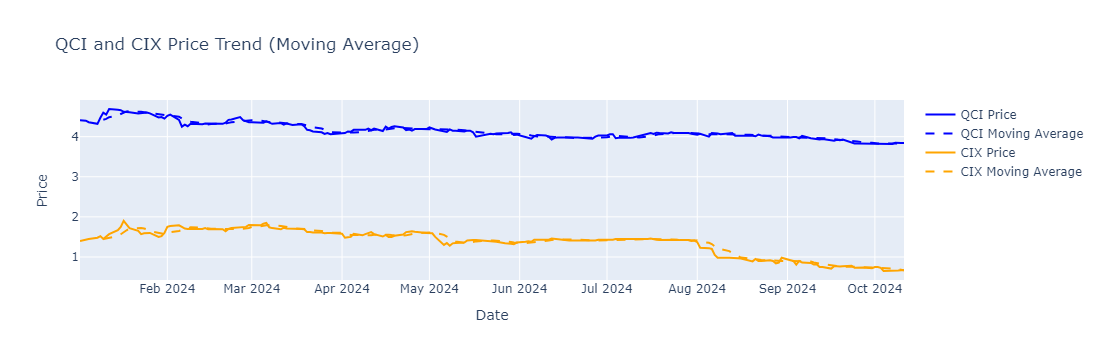

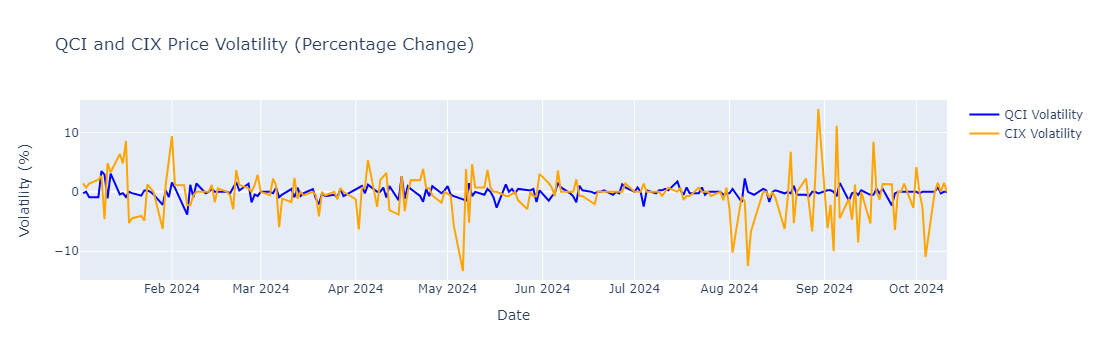

Correlation between QCI and CIX prices: 0.7215676144021036


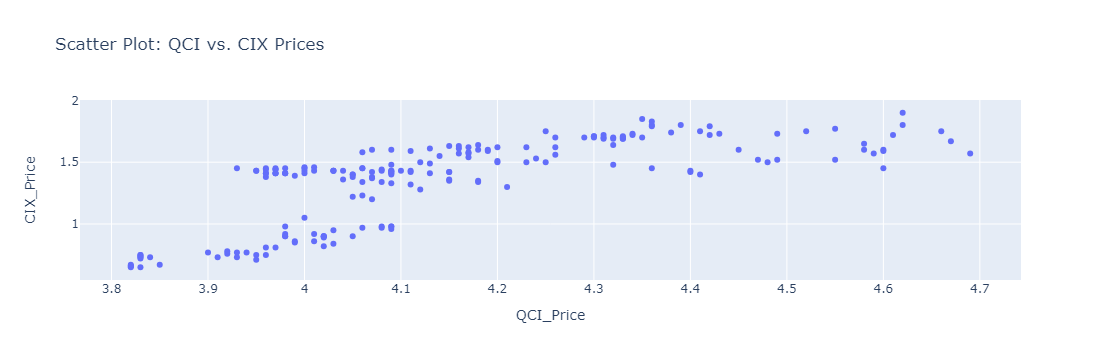

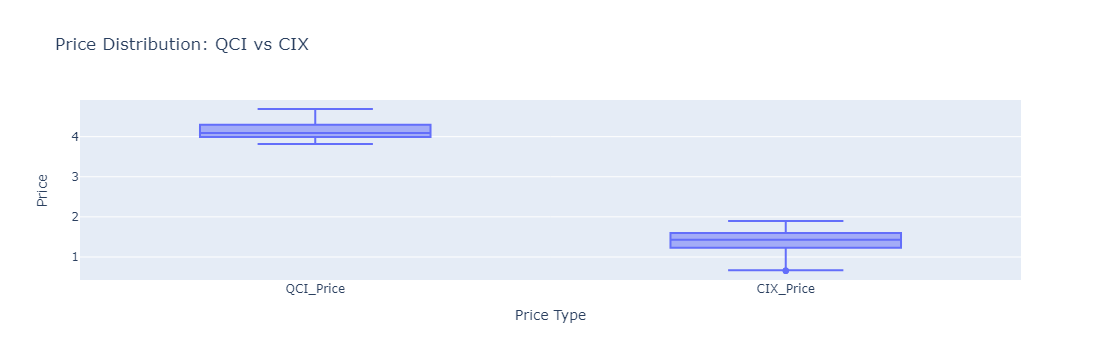

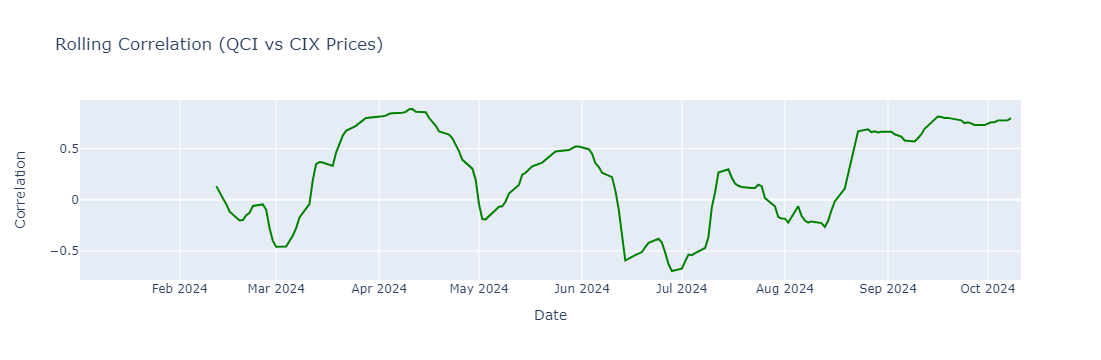

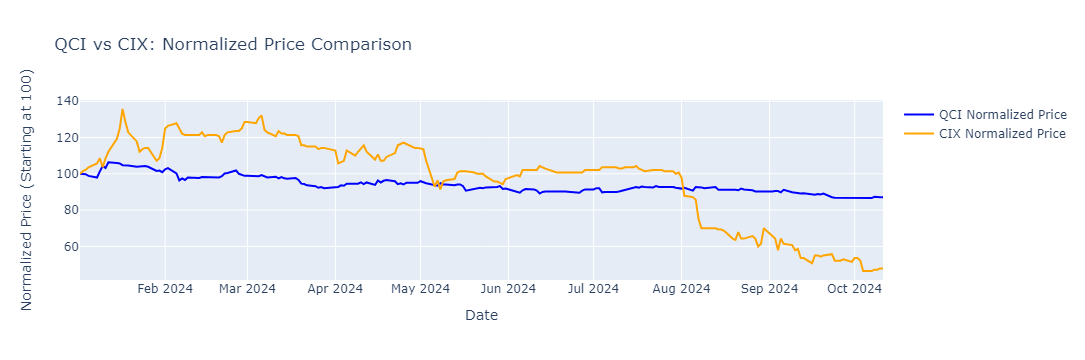

In [68]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\VCSREDD_v20_vs_CNX.csv"
data = pd.read_csv(file_path)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CIX_Date'] = pd.to_datetime(data['CIX_Date'], format='%d/%m/%Y')

# Set up QCI and CIX columns for convenience
data['QCI_Price'] = pd.to_numeric(data['QCI_Price'], errors='coerce')
data['CIX_Price'] = pd.to_numeric(data['CIX_Price'], errors='coerce')

### 1. Trend Analysis: Moving Average
# Calculate 7-day moving averages for QCI and CIX Prices
data['QCI_MA'] = data['QCI_Price'].rolling(window=7).mean()
data['CIX_MA'] = data['CIX_Price'].rolling(window=7).mean()

# Plot the moving averages
fig = go.Figure()

# Add QCI Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Price'], mode='lines', name='QCI Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_MA'], mode='lines', name='QCI Moving Average', line=dict(color='blue', dash='dash')))

# Add CIX Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Price'], mode='lines', name='CIX Price', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_MA'], mode='lines', name='CIX Moving Average', line=dict(color='orange', dash='dash')))

# Layout
fig.update_layout(title="QCI and CIX Price Trend (Moving Average)", xaxis_title="Date", yaxis_title="Price")
fig.show()

### 2. Volatility Analysis: Daily Percentage Change
# Calculate percentage change for QCI and CIX prices
data['QCI_Volatility'] = data['QCI_Price'].pct_change() * 100
data['CIX_Volatility'] = data['CIX_Price'].pct_change() * 100

# Plot the volatility (percentage changes)
fig = go.Figure()

# Add QCI Volatility
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Volatility'], mode='lines', name='QCI Volatility', line=dict(color='blue')))

# Add CIX Volatility
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Volatility'], mode='lines', name='CIX Volatility', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI and CIX Price Volatility (Percentage Change)", xaxis_title="Date", yaxis_title="Volatility (%)")
fig.show()

### 3. Correlation Analysis
# Calculate the correlation between QCI and CIX Prices
correlation = data['QCI_Price'].corr(data['CIX_Price'])
print(f"Correlation between QCI and CIX prices: {correlation}")

# Scatter plot for correlation
fig = px.scatter(data, x='QCI_Price', y='CIX_Price', title="Scatter Plot: QCI vs. CIX Prices", labels={'x':'QCI Price', 'y':'CIX Price'})
fig.show()

### 4. Price Distribution and Outliers
# Box plot of QCI and CIX Prices to show distribution and outliers
fig = px.box(data, y=['QCI_Price', 'CIX_Price'], title="Price Distribution: QCI vs CIX", labels={'variable':'Price Type', 'value':'Price'})
fig.show()

### 5. Rolling Window Correlation (30-day window)
# Calculate rolling correlation between QCI and CIX prices (using a 30-day window)
data['Rolling_Correlation'] = data['QCI_Price'].rolling(window=30).corr(data['CIX_Price'])

# Plot the rolling correlation
fig = go.Figure()

# Add Rolling Correlation trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['Rolling_Correlation'], mode='lines', name='Rolling Correlation', line=dict(color='green')))

# Layout
fig.update_layout(title="Rolling Correlation (QCI vs CIX Prices)", xaxis_title="Date", yaxis_title="Correlation")
fig.show()

### 6. Relative Performance: Normalized Prices
# Normalize the prices to 100 at the start of the period for comparison
data['QCI_Normalized'] = data['QCI_Price'] / data['QCI_Price'].iloc[0] * 100
data['CIX_Normalized'] = data['CIX_Price'] / data['CIX_Price'].iloc[0] * 100

# Plot the normalized prices to show relative performance
fig = go.Figure()

# Add QCI Normalized Price trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Normalized'], mode='lines', name='QCI Normalized Price', line=dict(color='blue')))

# Add CIX Normalized Price trace
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Normalized'], mode='lines', name='CIX Normalized Price', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI vs CIX: Normalized Price Comparison", xaxis_title="Date", yaxis_title="Normalized Price (Starting at 100)")
fig.show()


## VCS REDD+ CCB Gold Vintage 2019 20kt Spot $/offset vs CNX 2023

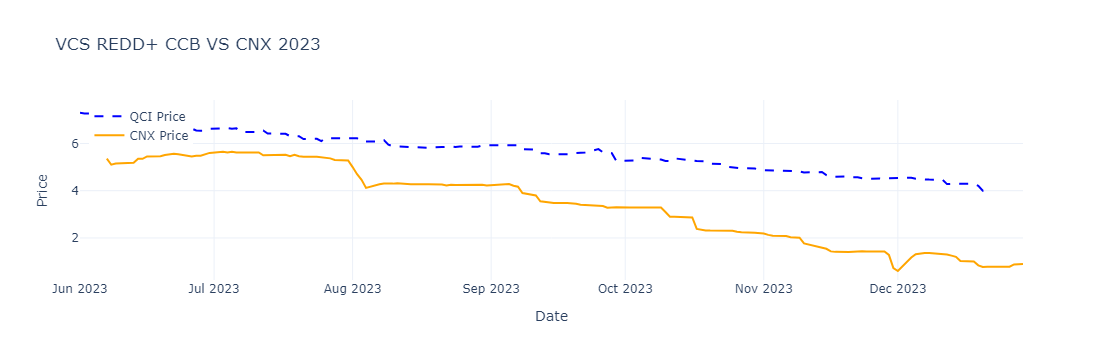

In [38]:
import warnings
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Step 2: Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\VCSREDD_v19_vs_CNX.csv"
data = pd.read_csv(file_path)

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CNX_Date'] = pd.to_datetime(data['CNX_Date'], format='%d/%m/%Y')

# Create the interactive plot with Plotly
fig = go.Figure()

# Add QCI Price trace without markers
fig.add_trace(go.Scatter(
    x=data['QCI_Date'], y=data['QCI_Price'],
    mode='lines',  # No markers, just lines
    name='QCI Price',
    line=dict(color='blue', dash='dash'),
    hovertemplate='Date: %{x}<br>QCI Price: %{y}<extra></extra>'
))

# Add CIX Price trace without markers
fig.add_trace(go.Scatter(
    x=data['CNX_Date'], y=data['CNX_Price'],
    mode='lines',  # No markers, just lines
    name='CNX Price',
    line=dict(color='orange'),
    hovertemplate='Date: %{x}<br>CIX Price: %{y}<extra></extra>'
))

# Customize the layout
fig.update_layout(
    title="VCS REDD+ CCB VS CNX 2023",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode='x',
    template='plotly_white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(x=0.01, y=0.99)
)

# Show the interactive plot
fig.show()

### Other Observations

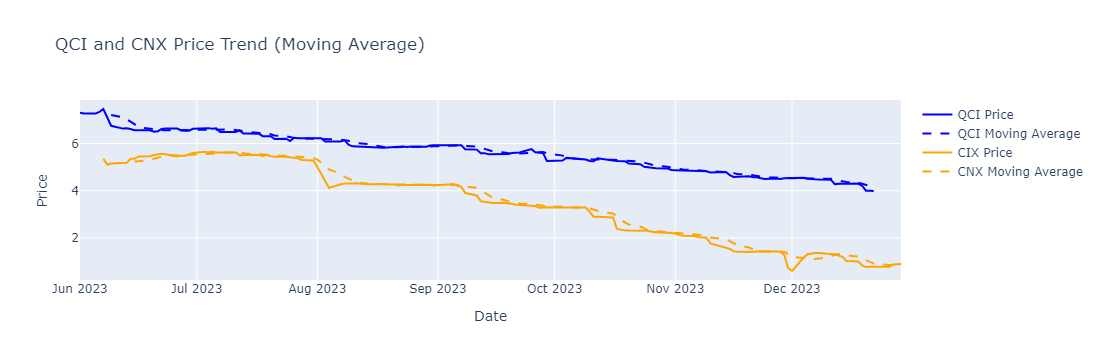

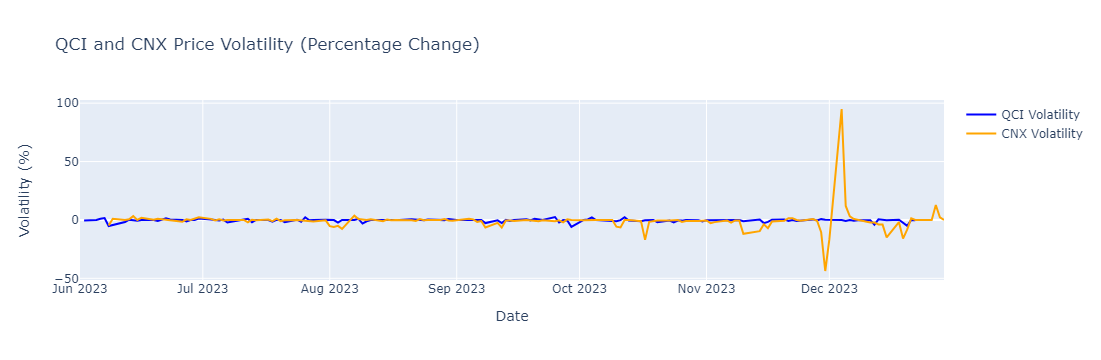

Correlation between QCI and CIX prices: 0.9632508594728522


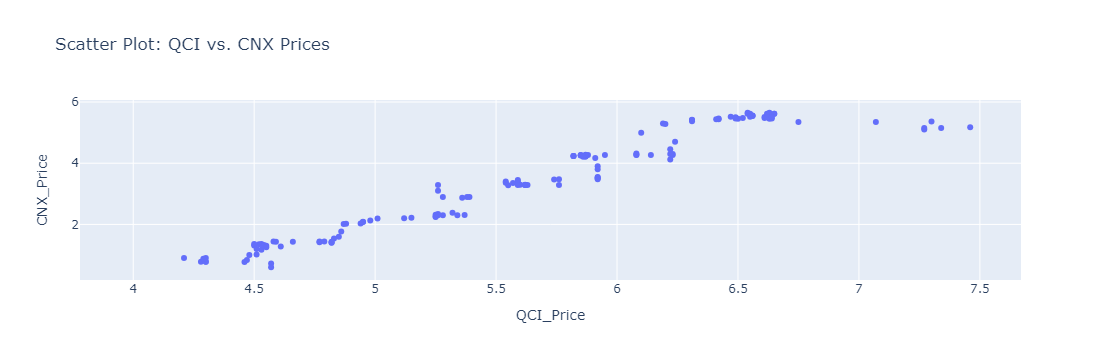

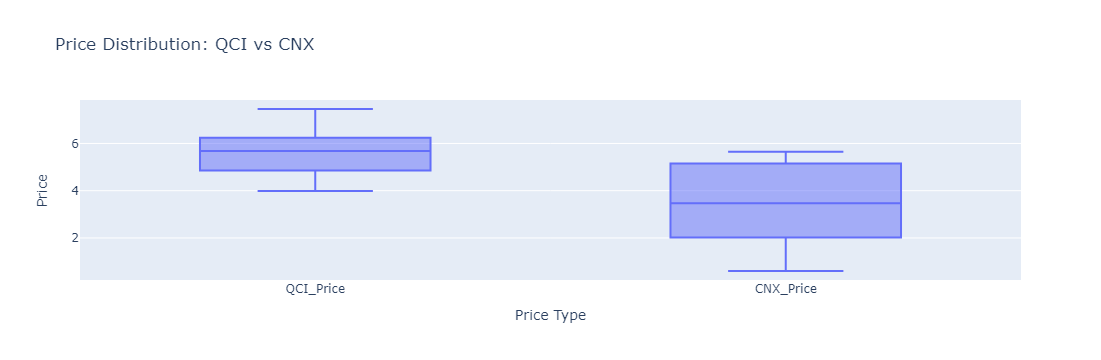

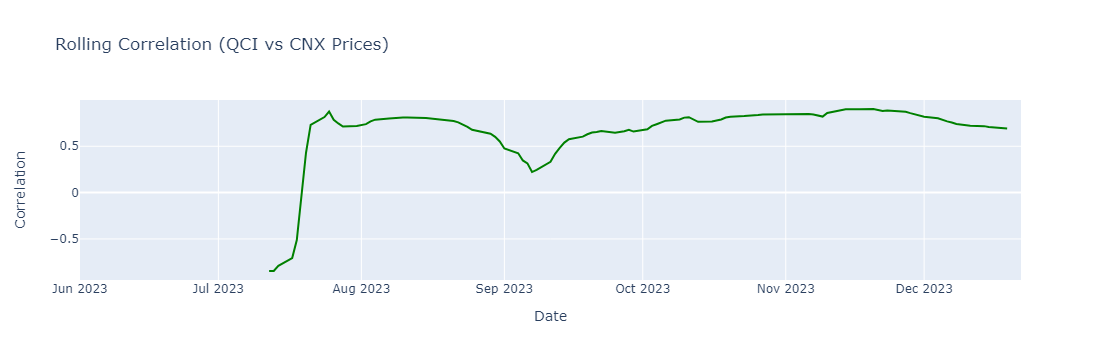

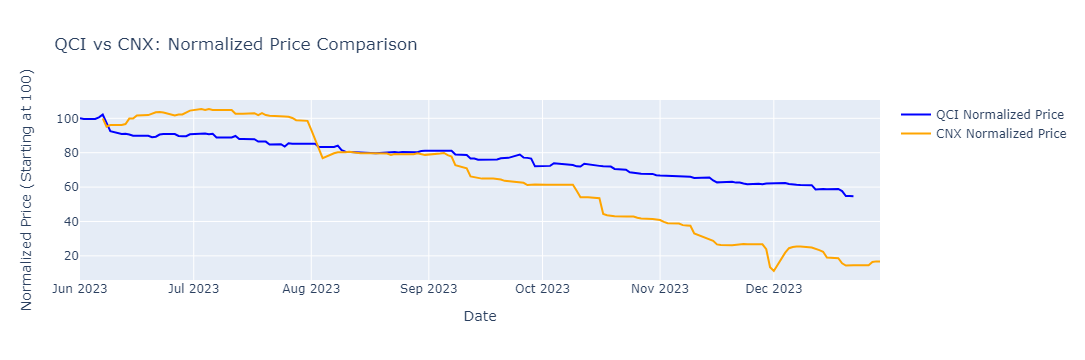

In [69]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\VCSREDD_v19_vs_CNX.csv"
data = pd.read_csv(file_path)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CNX_Date'] = pd.to_datetime(data['CNX_Date'], format='%d/%m/%Y')

# Set up QCI and CIX columns for convenience
data['QCI_Price'] = pd.to_numeric(data['QCI_Price'], errors='coerce')
data['CNX_Price'] = pd.to_numeric(data['CNX_Price'], errors='coerce')

### 1. Trend Analysis: Moving Average
# Calculate 7-day moving averages for QCI and CIX Prices
data['QCI_MA'] = data['QCI_Price'].rolling(window=7).mean()
data['CNX_MA'] = data['CNX_Price'].rolling(window=7).mean()

# Plot the moving averages
fig = go.Figure()

# Add QCI Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Price'], mode='lines', name='QCI Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_MA'], mode='lines', name='QCI Moving Average', line=dict(color='blue', dash='dash')))

# Add CIX Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['CNX_Date'], y=data['CNX_Price'], mode='lines', name='CIX Price', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['CNX_Date'], y=data['CNX_MA'], mode='lines', name='CNX Moving Average', line=dict(color='orange', dash='dash')))

# Layout
fig.update_layout(title="QCI and CNX Price Trend (Moving Average)", xaxis_title="Date", yaxis_title="Price")
fig.show()

### 2. Volatility Analysis: Daily Percentage Change
# Calculate percentage change for QCI and CIX prices
data['QCI_Volatility'] = data['QCI_Price'].pct_change() * 100
data['CNX_Volatility'] = data['CNX_Price'].pct_change() * 100

# Plot the volatility (percentage changes)
fig = go.Figure()

# Add QCI Volatility
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Volatility'], mode='lines', name='QCI Volatility', line=dict(color='blue')))

# Add CIX Volatility
fig.add_trace(go.Scatter(x=data['CNX_Date'], y=data['CNX_Volatility'], mode='lines', name='CNX Volatility', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI and CNX Price Volatility (Percentage Change)", xaxis_title="Date", yaxis_title="Volatility (%)")
fig.show()

### 3. Correlation Analysis
# Calculate the correlation between QCI and CIX Prices
correlation = data['QCI_Price'].corr(data['CNX_Price'])
print(f"Correlation between QCI and CIX prices: {correlation}")

# Scatter plot for correlation
fig = px.scatter(data, x='QCI_Price', y='CNX_Price', title="Scatter Plot: QCI vs. CNX Prices", labels={'x':'QCI Price', 'y':'CNX Price'})
fig.show()

### 4. Price Distribution and Outliers
# Box plot of QCI and CIX Prices to show distribution and outliers
fig = px.box(data, y=['QCI_Price', 'CNX_Price'], title="Price Distribution: QCI vs CNX", labels={'variable':'Price Type', 'value':'Price'})
fig.show()

### 5. Rolling Window Correlation (30-day window)
# Calculate rolling correlation between QCI and CIX prices (using a 30-day window)
data['Rolling_Correlation'] = data['QCI_Price'].rolling(window=30).corr(data['CNX_Price'])

# Plot the rolling correlation
fig = go.Figure()

# Add Rolling Correlation trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['Rolling_Correlation'], mode='lines', name='Rolling Correlation', line=dict(color='green')))

# Layout
fig.update_layout(title="Rolling Correlation (QCI vs CNX Prices)", xaxis_title="Date", yaxis_title="Correlation")
fig.show()

### 6. Relative Performance: Normalized Prices
# Normalize the prices to 100 at the start of the period for comparison
data['QCI_Normalized'] = data['QCI_Price'] / data['QCI_Price'].iloc[0] * 100
data['CNX_Normalized'] = data['CNX_Price'] / data['CNX_Price'].iloc[0] * 100

# Plot the normalized prices to show relative performance
fig = go.Figure()

# Add QCI Normalized Price trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Normalized'], mode='lines', name='QCI Normalized Price', line=dict(color='blue')))

# Add CIX Normalized Price trace
fig.add_trace(go.Scatter(x=data['CNX_Date'], y=data['CNX_Normalized'], mode='lines', name='CNX Normalized Price', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI vs CNX: Normalized Price Comparison", xaxis_title="Date", yaxis_title="Normalized Price (Starting at 100)")
fig.show()


## GS Clean cookstoves Africa V2020 20kt Spot $/offset vs CIX GS LDC v20

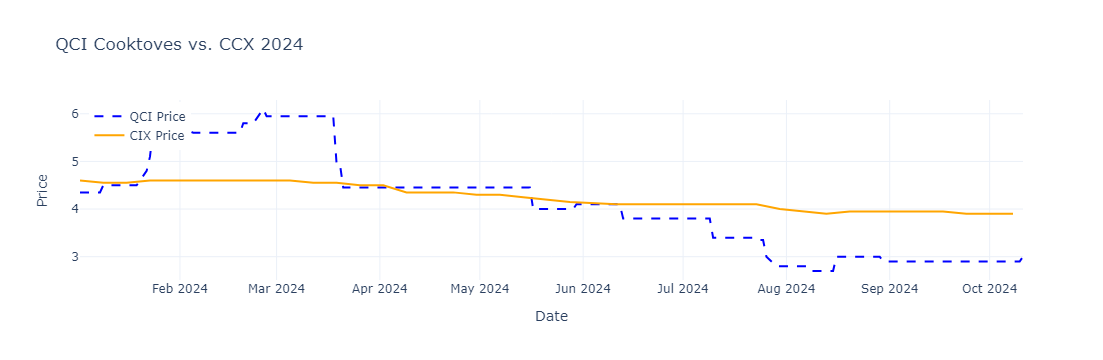

In [41]:
import warnings
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Step 2: Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\GS_Cookstoves_v20_vs_CNX_2024.csv"
data = pd.read_csv(file_path)

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CIX_Date'] = pd.to_datetime(data['CIX_Date'], format='%d/%m/%Y')

# Create the interactive plot with Plotly
fig = go.Figure()

# Add QCI Price trace without markers
fig.add_trace(go.Scatter(
    x=data['QCI_Date'], y=data['QCI_Price'],
    mode='lines',  # No markers, just lines
    name='QCI Price',
    line=dict(color='blue', dash='dash'),
    hovertemplate='Date: %{x}<br>QCI Price: %{y}<extra></extra>'
))

# Add CIX Price trace without markers
fig.add_trace(go.Scatter(
    x=data['CIX_Date'], y=data['CIX_Price'],
    mode='lines',  # No markers, just lines
    name='CIX Price',
    line=dict(color='orange'),
    hovertemplate='Date: %{x}<br>CIX Price: %{y}<extra></extra>'
))

# Customize the layout
fig.update_layout(
    title="QCI Cooktoves vs. CCX 2024",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode='x',
    template='plotly_white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(x=0.01, y=0.99)
)

# Show the interactive plot
fig.show()

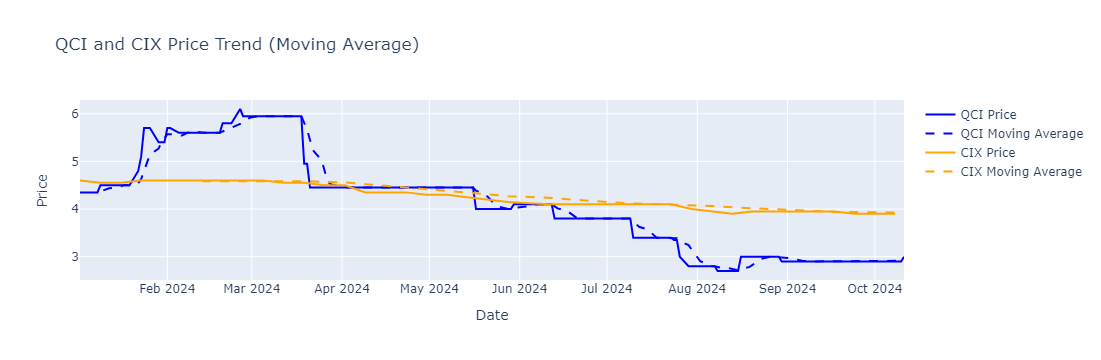

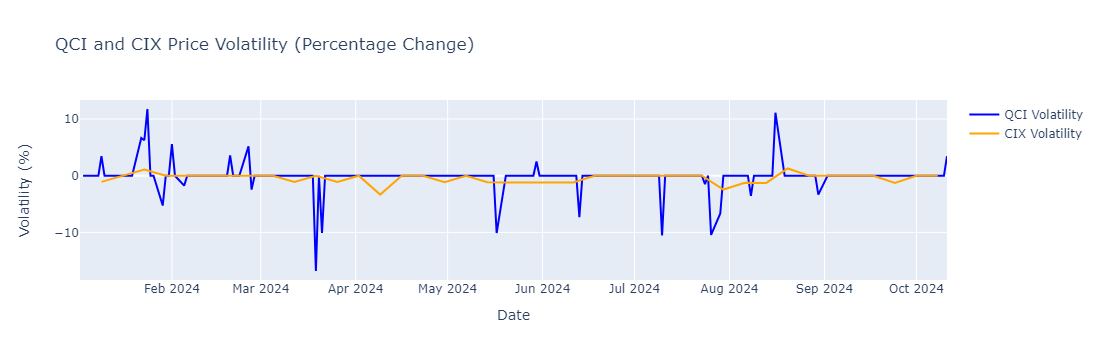

Correlation between QCI and CIX prices: -0.9215482419258532


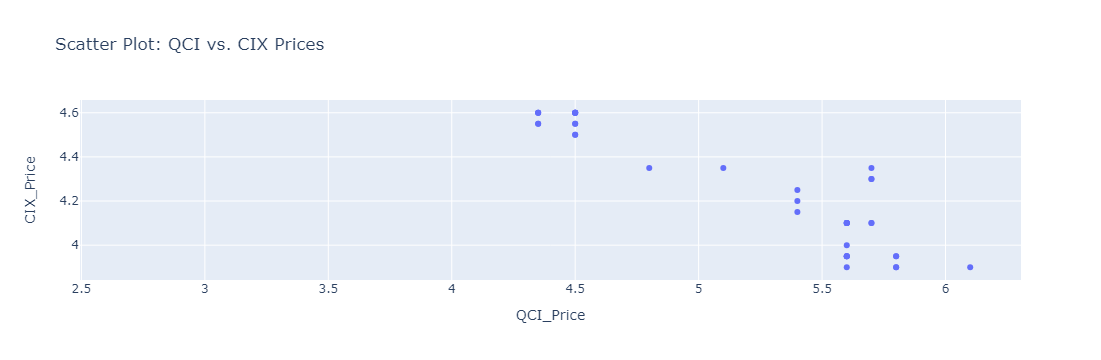

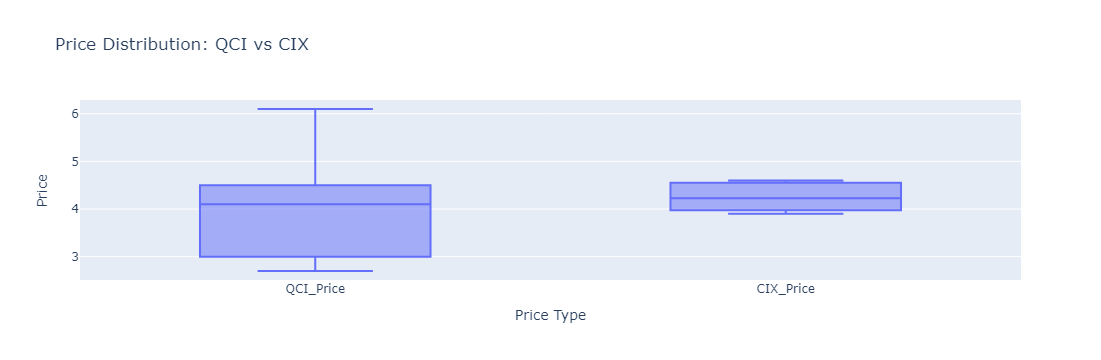

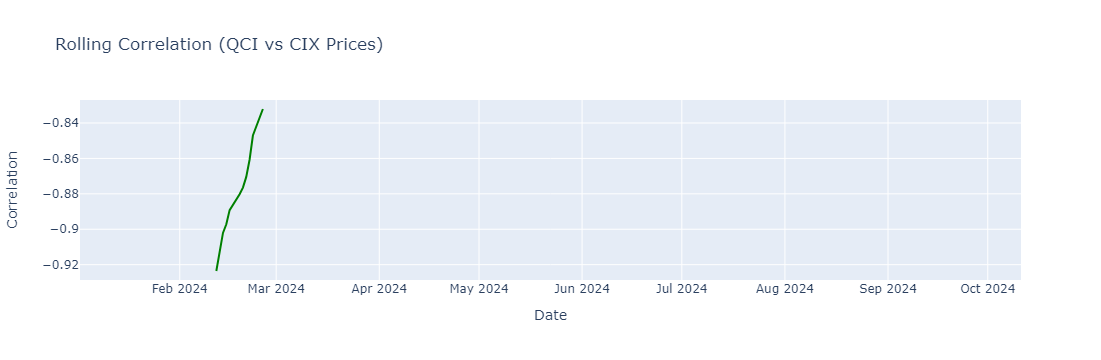

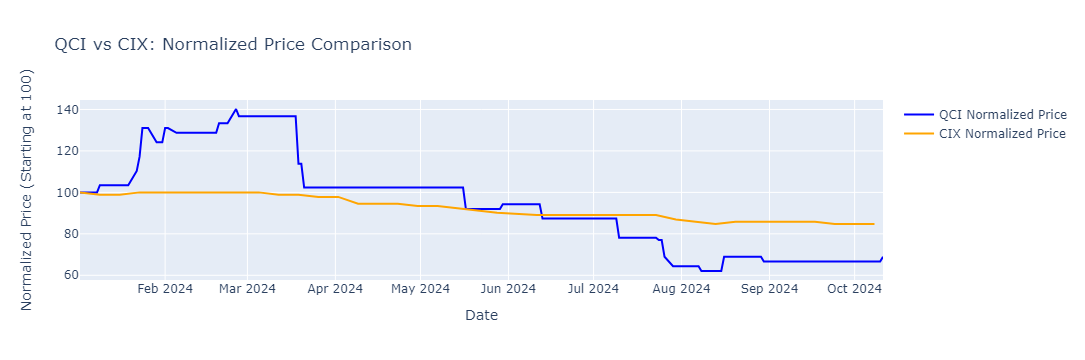

In [61]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\GS_Cookstoves_v20_vs_CNX_2024.csv"
data = pd.read_csv(file_path)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CIX_Date'] = pd.to_datetime(data['CIX_Date'], format='%d/%m/%Y')

# Set up QCI and CIX columns for convenience
data['QCI_Price'] = pd.to_numeric(data['QCI_Price'], errors='coerce')
data['CIX_Price'] = pd.to_numeric(data['CIX_Price'], errors='coerce')

### 1. Trend Analysis: Moving Average
# Calculate 7-day moving averages for QCI and CIX Prices
data['QCI_MA'] = data['QCI_Price'].rolling(window=7).mean()
data['CIX_MA'] = data['CIX_Price'].rolling(window=7).mean()

# Plot the moving averages
fig = go.Figure()

# Add QCI Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Price'], mode='lines', name='QCI Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_MA'], mode='lines', name='QCI Moving Average', line=dict(color='blue', dash='dash')))

# Add CIX Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Price'], mode='lines', name='CIX Price', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_MA'], mode='lines', name='CIX Moving Average', line=dict(color='orange', dash='dash')))

# Layout
fig.update_layout(title="QCI and CIX Price Trend (Moving Average)", xaxis_title="Date", yaxis_title="Price")
fig.show()

### 2. Volatility Analysis: Daily Percentage Change
# Calculate percentage change for QCI and CIX prices
data['QCI_Volatility'] = data['QCI_Price'].pct_change() * 100
data['CIX_Volatility'] = data['CIX_Price'].pct_change() * 100

# Plot the volatility (percentage changes)
fig = go.Figure()

# Add QCI Volatility
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Volatility'], mode='lines', name='QCI Volatility', line=dict(color='blue')))

# Add CIX Volatility
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Volatility'], mode='lines', name='CIX Volatility', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI and CIX Price Volatility (Percentage Change)", xaxis_title="Date", yaxis_title="Volatility (%)")
fig.show()

### 3. Correlation Analysis
# Calculate the correlation between QCI and CIX Prices
correlation = data['QCI_Price'].corr(data['CIX_Price'])
print(f"Correlation between QCI and CIX prices: {correlation}")

# Scatter plot for correlation
fig = px.scatter(data, x='QCI_Price', y='CIX_Price', title="Scatter Plot: QCI vs. CIX Prices", labels={'x':'QCI Price', 'y':'CIX Price'})
fig.show()

### 4. Price Distribution and Outliers
# Box plot of QCI and CIX Prices to show distribution and outliers
fig = px.box(data, y=['QCI_Price', 'CIX_Price'], title="Price Distribution: QCI vs CIX", labels={'variable':'Price Type', 'value':'Price'})
fig.show()

### 5. Rolling Window Correlation (30-day window)
# Calculate rolling correlation between QCI and CIX prices (using a 30-day window)
data['Rolling_Correlation'] = data['QCI_Price'].rolling(window=30).corr(data['CIX_Price'])

# Plot the rolling correlation
fig = go.Figure()

# Add Rolling Correlation trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['Rolling_Correlation'], mode='lines', name='Rolling Correlation', line=dict(color='green')))

# Layout
fig.update_layout(title="Rolling Correlation (QCI vs CIX Prices)", xaxis_title="Date", yaxis_title="Correlation")
fig.show()

### 6. Relative Performance: Normalized Prices
# Normalize the prices to 100 at the start of the period for comparison
data['QCI_Normalized'] = data['QCI_Price'] / data['QCI_Price'].iloc[0] * 100
data['CIX_Normalized'] = data['CIX_Price'] / data['CIX_Price'].iloc[0] * 100

# Plot the normalized prices to show relative performance
fig = go.Figure()

# Add QCI Normalized Price trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Normalized'], mode='lines', name='QCI Normalized Price', line=dict(color='blue')))

# Add CIX Normalized Price trace
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Normalized'], mode='lines', name='CIX Normalized Price', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI vs CIX: Normalized Price Comparison", xaxis_title="Date", yaxis_title="Normalized Price (Starting at 100)")
fig.show()


## GS Clean cookstoves Africa V2019 20kt Spot $/offset vs CIX GS LDC v19

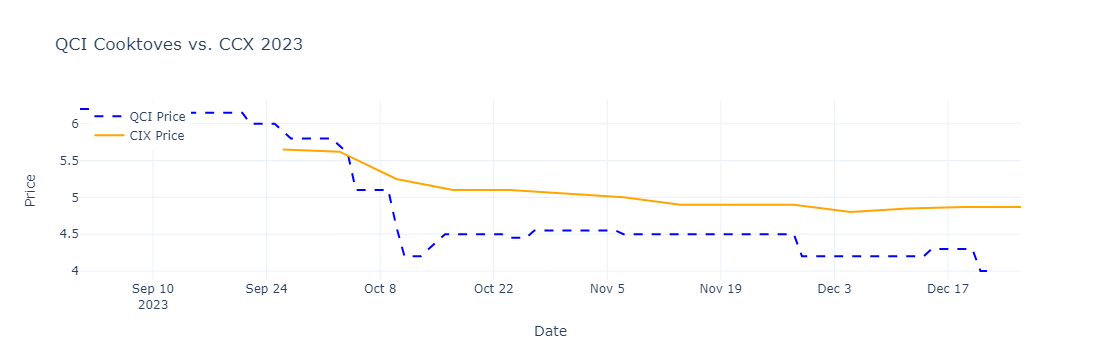

In [59]:
import warnings
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Step 2: Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\GS_Cookstoves_v19_vs_CCX.csv"
data = pd.read_csv(file_path)

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CIX_Date'] = pd.to_datetime(data['CIX_Date'], format='%d/%m/%Y')

# Create the interactive plot with Plotly
fig = go.Figure()

# Add QCI Price trace without markers
fig.add_trace(go.Scatter(
    x=data['QCI_Date'], y=data['QCI_Price'],
    mode='lines',  # No markers, just lines
    name='QCI Price',
    line=dict(color='blue', dash='dash'),
    hovertemplate='Date: %{x}<br>QCI Price: %{y}<extra></extra>'
))

# Add CIX Price trace without markers
fig.add_trace(go.Scatter(
    x=data['CIX_Date'], y=data['CIX_Price'],
    mode='lines',  # No markers, just lines
    name='CIX Price',
    line=dict(color='orange'),
    hovertemplate='Date: %{x}<br>CIX Price: %{y}<extra></extra>'
))

# Customize the layout
fig.update_layout(
    title="QCI Cooktoves vs. CCX 2023",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode='x',
    template='plotly_white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(x=0.01, y=0.99)
)

# Show the interactive plot
fig.show()

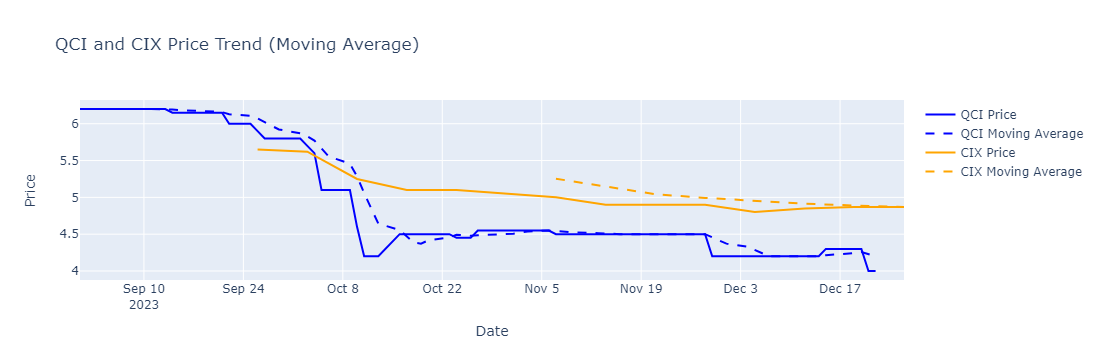

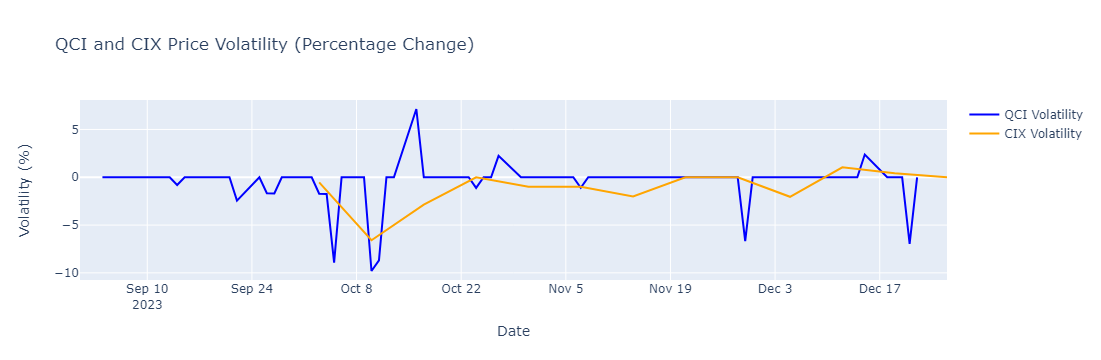

Correlation between QCI and CIX prices: 0.5774208929366909


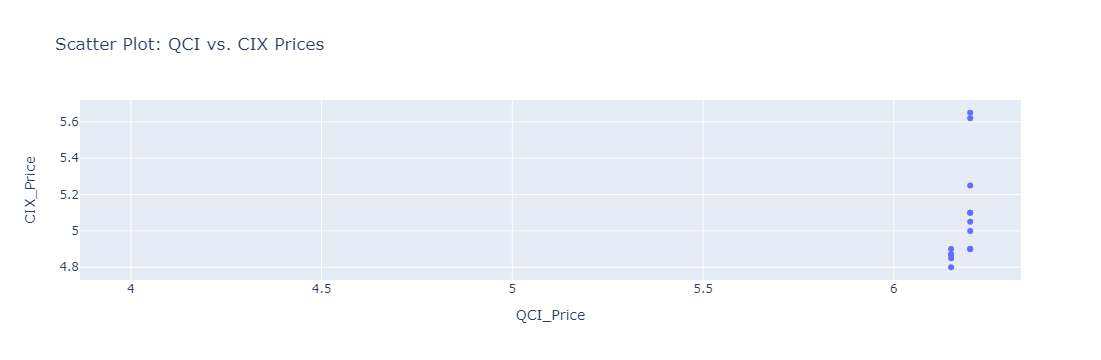

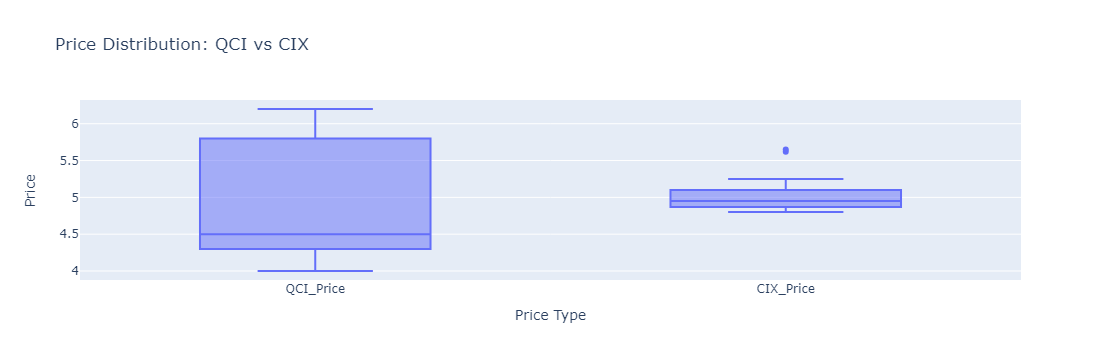

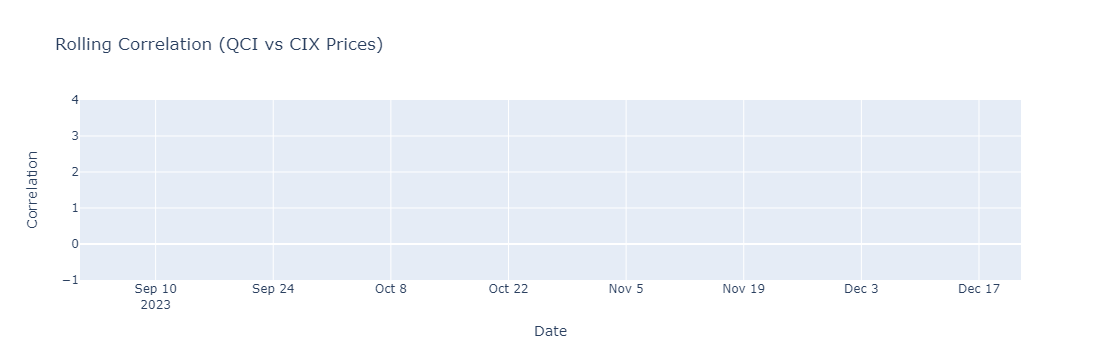

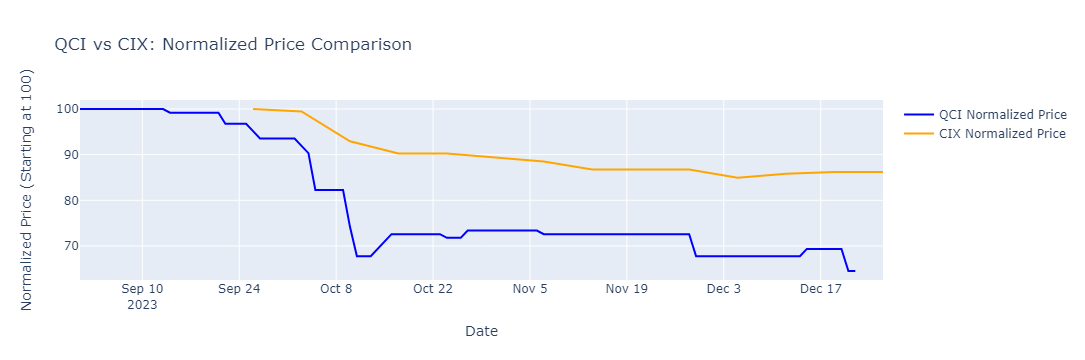

In [60]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the CSV file into a pandas DataFrame
file_path =  r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\GS_Cookstoves_v19_vs_CCX.csv"
data = pd.read_csv(file_path)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CIX_Date'] = pd.to_datetime(data['CIX_Date'], format='%d/%m/%Y')

# Set up QCI and CIX columns for convenience
data['QCI_Price'] = pd.to_numeric(data['QCI_Price'], errors='coerce')
data['CIX_Price'] = pd.to_numeric(data['CIX_Price'], errors='coerce')

### 1. Trend Analysis: Moving Average
# Calculate 7-day moving averages for QCI and CIX Prices
data['QCI_MA'] = data['QCI_Price'].rolling(window=7).mean()
data['CIX_MA'] = data['CIX_Price'].rolling(window=7).mean()

# Plot the moving averages
fig = go.Figure()

# Add QCI Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Price'], mode='lines', name='QCI Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_MA'], mode='lines', name='QCI Moving Average', line=dict(color='blue', dash='dash')))

# Add CIX Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Price'], mode='lines', name='CIX Price', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_MA'], mode='lines', name='CIX Moving Average', line=dict(color='orange', dash='dash')))

# Layout
fig.update_layout(title="QCI and CIX Price Trend (Moving Average)", xaxis_title="Date", yaxis_title="Price")
fig.show()

### 2. Volatility Analysis: Daily Percentage Change
# Calculate percentage change for QCI and CIX prices
data['QCI_Volatility'] = data['QCI_Price'].pct_change() * 100
data['CIX_Volatility'] = data['CIX_Price'].pct_change() * 100

# Plot the volatility (percentage changes)
fig = go.Figure()

# Add QCI Volatility
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Volatility'], mode='lines', name='QCI Volatility', line=dict(color='blue')))

# Add CIX Volatility
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Volatility'], mode='lines', name='CIX Volatility', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI and CIX Price Volatility (Percentage Change)", xaxis_title="Date", yaxis_title="Volatility (%)")
fig.show()

### 3. Correlation Analysis
# Calculate the correlation between QCI and CIX Prices
correlation = data['QCI_Price'].corr(data['CIX_Price'])
print(f"Correlation between QCI and CIX prices: {correlation}")

# Scatter plot for correlation
fig = px.scatter(data, x='QCI_Price', y='CIX_Price', title="Scatter Plot: QCI vs. CIX Prices", labels={'x':'QCI Price', 'y':'CIX Price'})
fig.show()

### 4. Price Distribution and Outliers
# Box plot of QCI and CIX Prices to show distribution and outliers
fig = px.box(data, y=['QCI_Price', 'CIX_Price'], title="Price Distribution: QCI vs CIX", labels={'variable':'Price Type', 'value':'Price'})
fig.show()

### 5. Rolling Window Correlation (30-day window)
# Calculate rolling correlation between QCI and CIX prices (using a 30-day window)
data['Rolling_Correlation'] = data['QCI_Price'].rolling(window=30).corr(data['CIX_Price'])

# Plot the rolling correlation
fig = go.Figure()

# Add Rolling Correlation trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['Rolling_Correlation'], mode='lines', name='Rolling Correlation', line=dict(color='green')))

# Layout
fig.update_layout(title="Rolling Correlation (QCI vs CIX Prices)", xaxis_title="Date", yaxis_title="Correlation")
fig.show()

### 6. Relative Performance: Normalized Prices
# Normalize the prices to 100 at the start of the period for comparison
data['QCI_Normalized'] = data['QCI_Price'] / data['QCI_Price'].iloc[0] * 100
data['CIX_Normalized'] = data['CIX_Price'] / data['CIX_Price'].iloc[0] * 100

# Plot the normalized prices to show relative performance
fig = go.Figure()

# Add QCI Normalized Price trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Normalized'], mode='lines', name='QCI Normalized Price', line=dict(color='blue')))

# Add CIX Normalized Price trace
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Normalized'], mode='lines', name='CIX Normalized Price', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI vs CIX: Normalized Price Comparison", xaxis_title="Date", yaxis_title="Normalized Price (Starting at 100)")
fig.show()


## VCS CCB/GS Latam ARR 2020 Spot $/offset vs CIX CAX v20

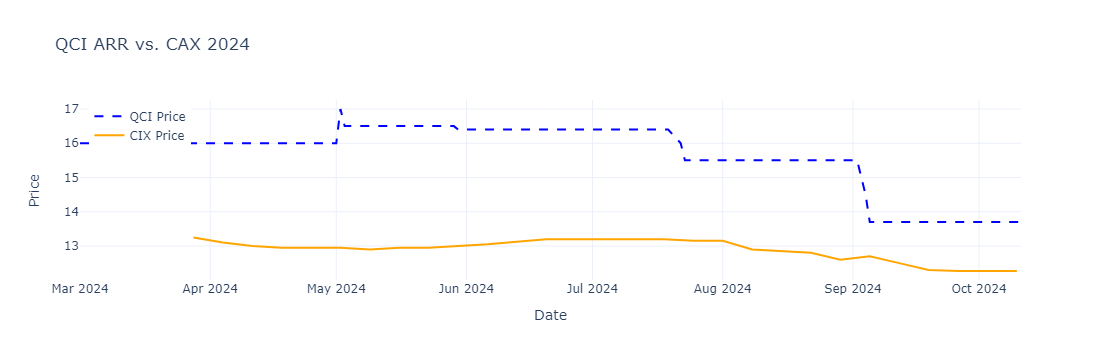

In [54]:
import warnings
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\QCI_ARR_vs_CAX.csv"
data = pd.read_csv(file_path)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CIX_Date'] = pd.to_datetime(data['CIX_Date'], format='%d/%m/%Y')

# Create the interactive plot with Plotly
fig = go.Figure()

# Add QCI Price trace
fig.add_trace(go.Scatter(
    x=data['QCI_Date'], y=data['QCI_Price'],
    mode='lines', name='QCI Price',
    line=dict(color='blue', dash='dash'),
    hovertemplate='Date: %{x}<br>QCI Price: %{y}<extra></extra>'
))

# Add CIX Price trace
fig.add_trace(go.Scatter(
    x=data['CIX_Date'], y=data['CIX_Price'],
    mode='lines', name='CIX Price',
    line=dict(color='orange'),
    hovertemplate='Date: %{x}<br>CIX Price: %{y}<extra></extra>'
))

# Customize the layout
fig.update_layout(
    title="QCI ARR vs. CAX 2024",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode='x',
    template='plotly_white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(x=0.01, y=0.99)
)

# Show the interactive plot
fig.show()

data['QCI_MA'] = data['QCI_Price'].rolling(window=7).mean()
data['CIX_MA'] = data['CIX_Price'].rolling(window=7).mean()


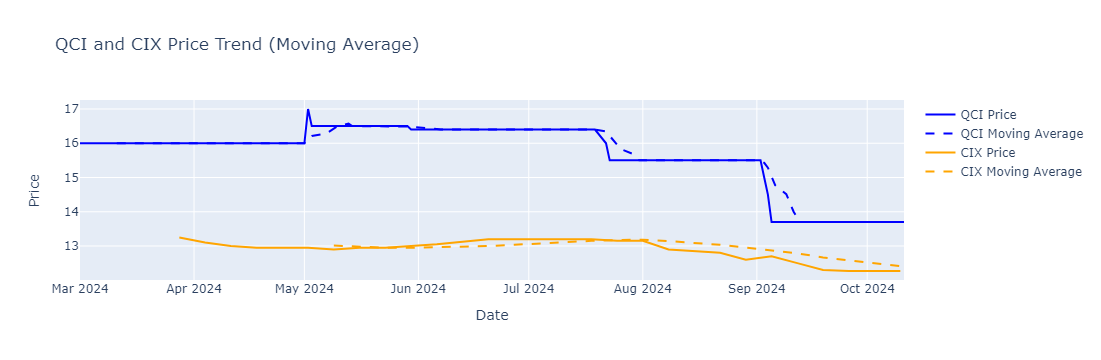

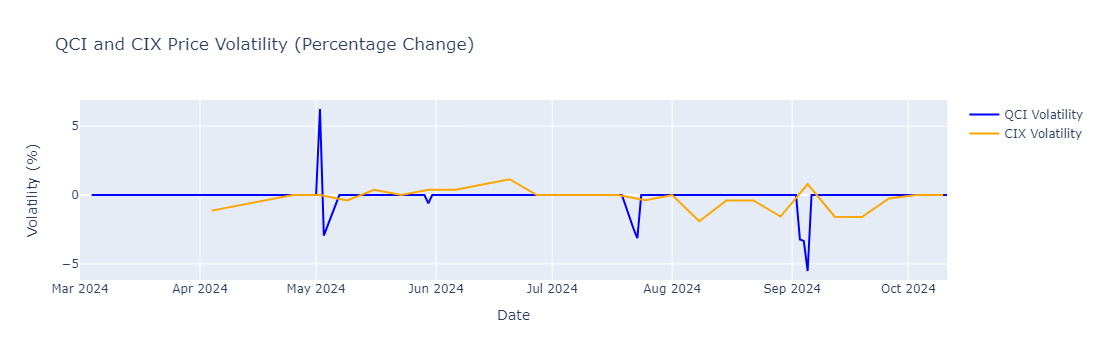

Correlation between QCI and CIX prices: nan


C:\Users\AyeshaShoaib\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

C:\Users\AyeshaShoaib\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



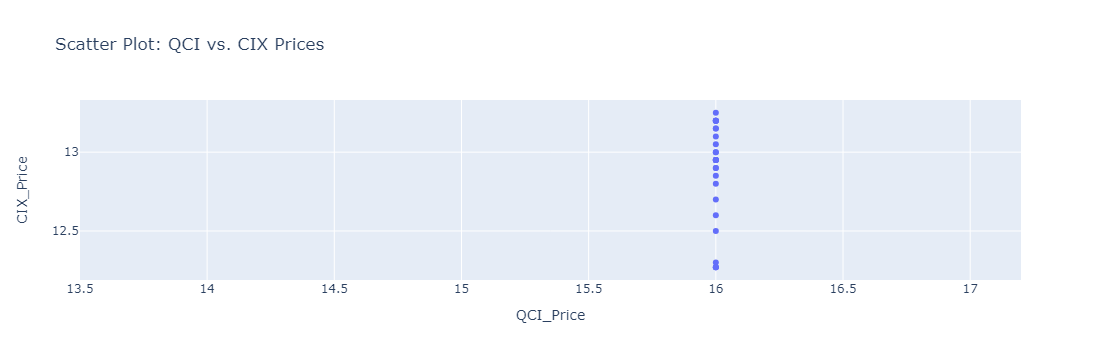

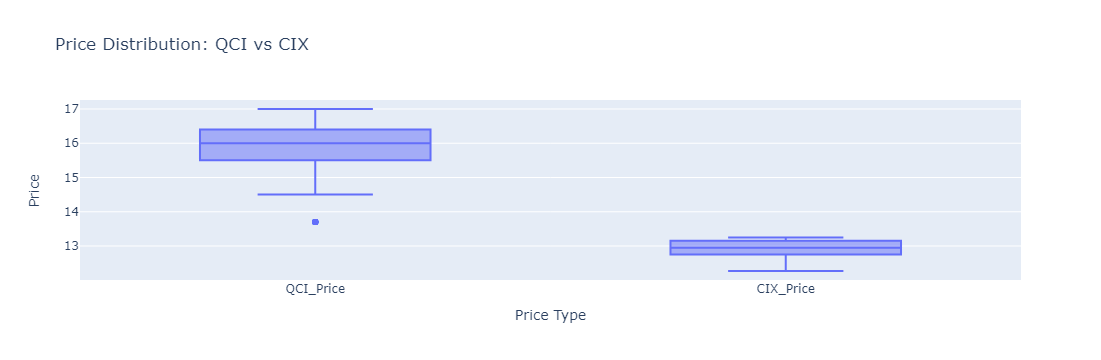

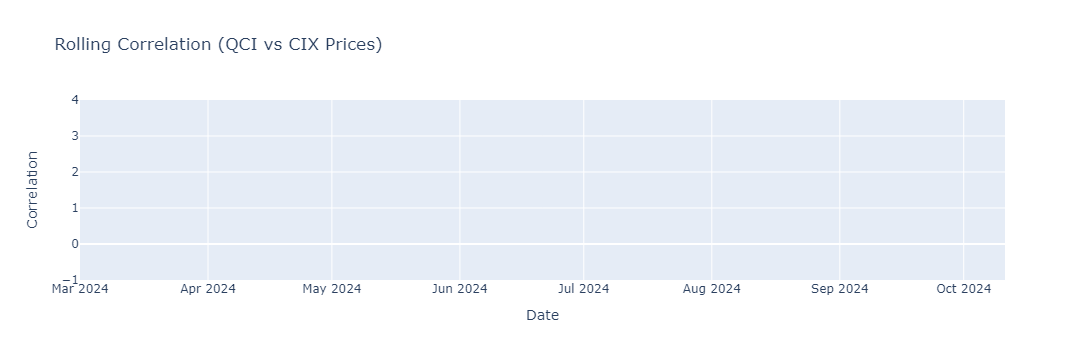

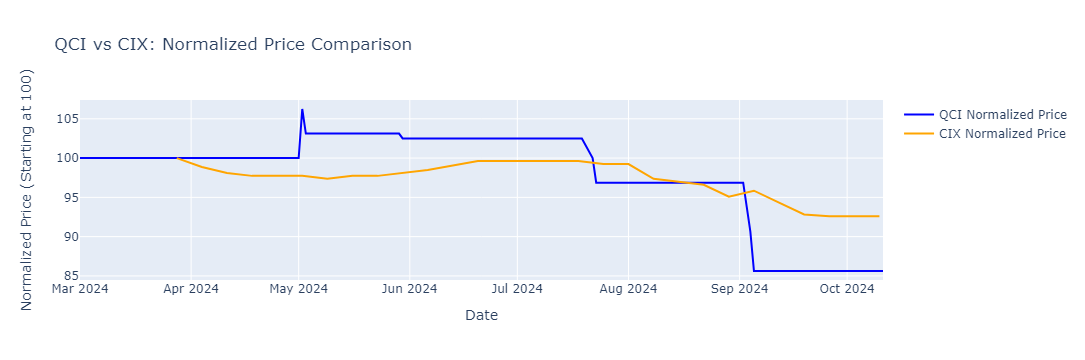

In [55]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the CSV file into a pandas DataFrame
file_path = r"C:\Users\AyeshaShoaib\OneDrive - Verified Impact Exchange Holdings Pte Ltd\Documents\QCI vs CIX Analysis\QCI_ARR_vs_CAX.csv"
data = pd.read_csv(file_path)

# Convert the date columns to datetime format
data['QCI_Date'] = pd.to_datetime(data['QCI_Date'], format='%d/%m/%Y')
data['CIX_Date'] = pd.to_datetime(data['CIX_Date'], format='%d/%m/%Y')

# Set up QCI and CIX columns for convenience
data['QCI_Price'] = pd.to_numeric(data['QCI_Price'], errors='coerce')
data['CIX_Price'] = pd.to_numeric(data['CIX_Price'], errors='coerce')

### 1. Trend Analysis: Moving Average
# Calculate 7-day moving averages for QCI and CIX Prices
data['QCI_MA'] = data['QCI_Price'].rolling(window=7).mean()
data['CIX_MA'] = data['CIX_Price'].rolling(window=7).mean()

# Plot the moving averages
fig = go.Figure()

# Add QCI Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Price'], mode='lines', name='QCI Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_MA'], mode='lines', name='QCI Moving Average', line=dict(color='blue', dash='dash')))

# Add CIX Price and Moving Average trace
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Price'], mode='lines', name='CIX Price', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_MA'], mode='lines', name='CIX Moving Average', line=dict(color='orange', dash='dash')))

# Layout
fig.update_layout(title="QCI and CIX Price Trend (Moving Average)", xaxis_title="Date", yaxis_title="Price")
fig.show()

### 2. Volatility Analysis: Daily Percentage Change
# Calculate percentage change for QCI and CIX prices
data['QCI_Volatility'] = data['QCI_Price'].pct_change() * 100
data['CIX_Volatility'] = data['CIX_Price'].pct_change() * 100

# Plot the volatility (percentage changes)
fig = go.Figure()

# Add QCI Volatility
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Volatility'], mode='lines', name='QCI Volatility', line=dict(color='blue')))

# Add CIX Volatility
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Volatility'], mode='lines', name='CIX Volatility', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI and CIX Price Volatility (Percentage Change)", xaxis_title="Date", yaxis_title="Volatility (%)")
fig.show()

### 3. Correlation Analysis
# Calculate the correlation between QCI and CIX Prices
correlation = data['QCI_Price'].corr(data['CIX_Price'])
print(f"Correlation between QCI and CIX prices: {correlation}")

# Scatter plot for correlation
fig = px.scatter(data, x='QCI_Price', y='CIX_Price', title="Scatter Plot: QCI vs. CIX Prices", labels={'x':'QCI Price', 'y':'CIX Price'})
fig.show()

### 4. Price Distribution and Outliers
# Box plot of QCI and CIX Prices to show distribution and outliers
fig = px.box(data, y=['QCI_Price', 'CIX_Price'], title="Price Distribution: QCI vs CIX", labels={'variable':'Price Type', 'value':'Price'})
fig.show()

### 5. Rolling Window Correlation (30-day window)
# Calculate rolling correlation between QCI and CIX prices (using a 30-day window)
data['Rolling_Correlation'] = data['QCI_Price'].rolling(window=30).corr(data['CIX_Price'])

# Plot the rolling correlation
fig = go.Figure()

# Add Rolling Correlation trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['Rolling_Correlation'], mode='lines', name='Rolling Correlation', line=dict(color='green')))

# Layout
fig.update_layout(title="Rolling Correlation (QCI vs CIX Prices)", xaxis_title="Date", yaxis_title="Correlation")
fig.show()

### 6. Relative Performance: Normalized Prices
# Normalize the prices to 100 at the start of the period for comparison
data['QCI_Normalized'] = data['QCI_Price'] / data['QCI_Price'].iloc[0] * 100
data['CIX_Normalized'] = data['CIX_Price'] / data['CIX_Price'].iloc[0] * 100

# Plot the normalized prices to show relative performance
fig = go.Figure()

# Add QCI Normalized Price trace
fig.add_trace(go.Scatter(x=data['QCI_Date'], y=data['QCI_Normalized'], mode='lines', name='QCI Normalized Price', line=dict(color='blue')))

# Add CIX Normalized Price trace
fig.add_trace(go.Scatter(x=data['CIX_Date'], y=data['CIX_Normalized'], mode='lines', name='CIX Normalized Price', line=dict(color='orange')))

# Layout
fig.update_layout(title="QCI vs CIX: Normalized Price Comparison", xaxis_title="Date", yaxis_title="Normalized Price (Starting at 100)")
fig.show()
